# Turning your plots into movies

Click on the link and download Davinci Resolve

https://www.blackmagicdesign.com/products/davinciresolve/?gclid=Cj0KCQiAiNnuBRD3ARIsAM8Kmls3S2OQNfMbAOVYjWgLY5zYwAiPMcBvW4Ecc-kgoEz_8BPjmkXpCbsaAjNxEALw_wcB

While it's downloading, save the figures below.
I would recommend titling them 0,1,2,3, etc. as they're titled.

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from mpl_toolkits.basemap import Basemap

/Users/xfm684/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/xfm684/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = [12,8]
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['savefig.dpi'] = 200

mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth'] = 2.0


In [3]:
hycom2002_test = xr.open_mfdataset('/Users/xfm684/Documents/Research/HYCOM/hycom_gomu_501_2002*0100_t000.nc', decode_times=False)

In [4]:
for time_index in range(0, hycom2002_test.time.shape[0]):
    print(time_index)

0
1
2
3
4
5
6
7
8
9
10
11


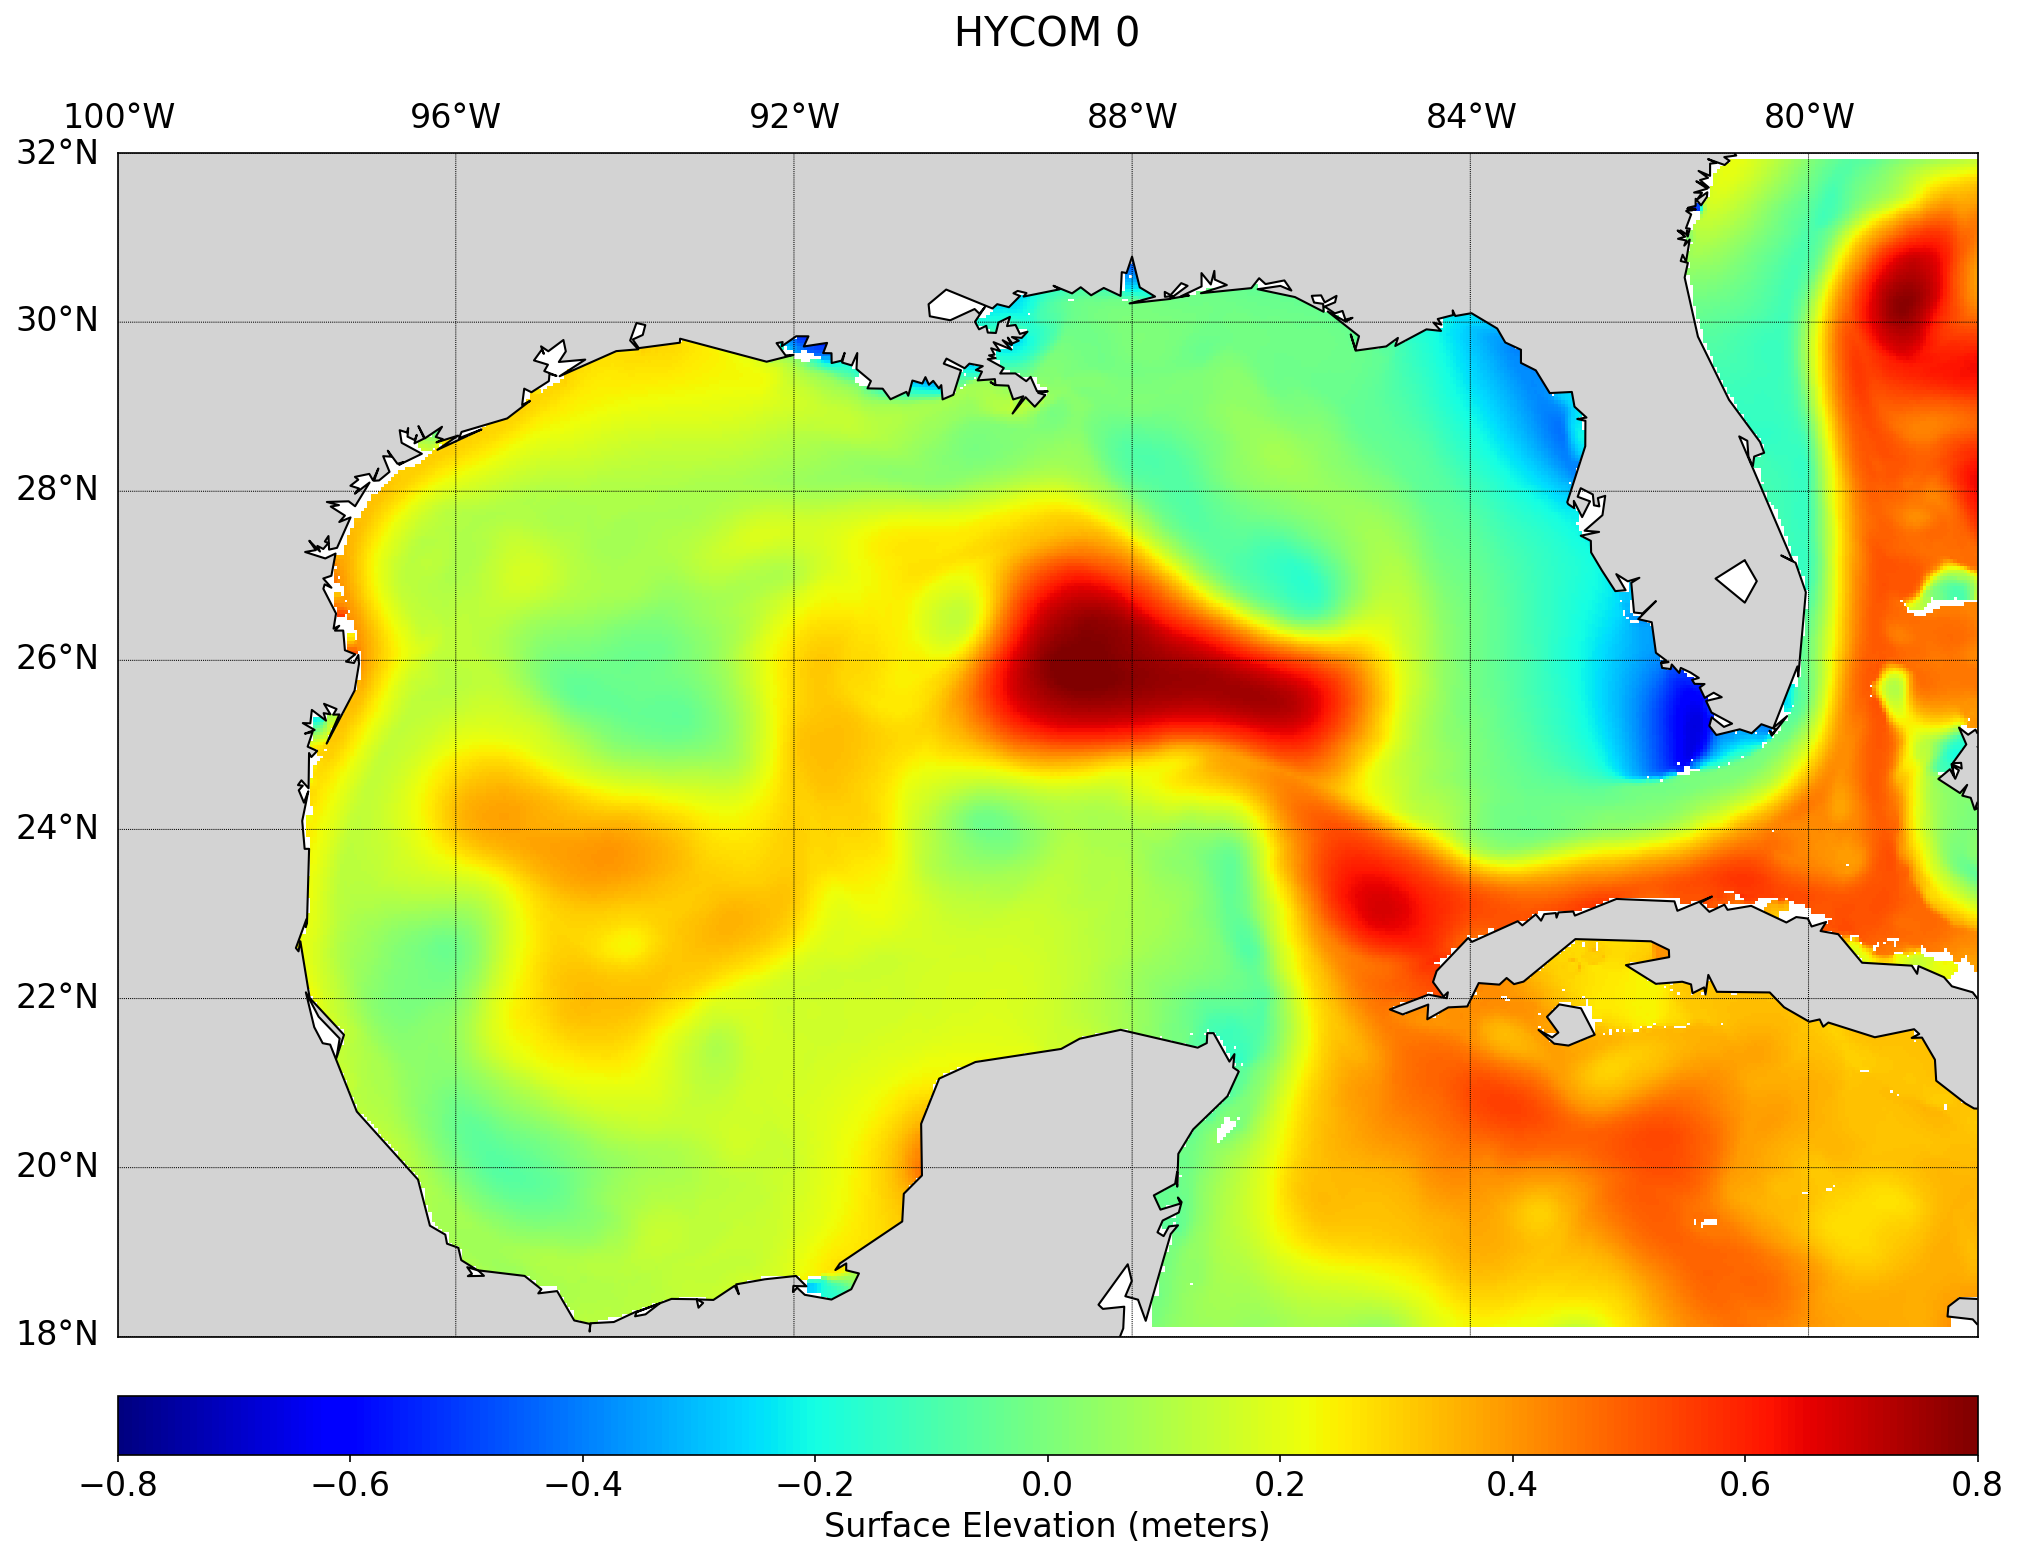

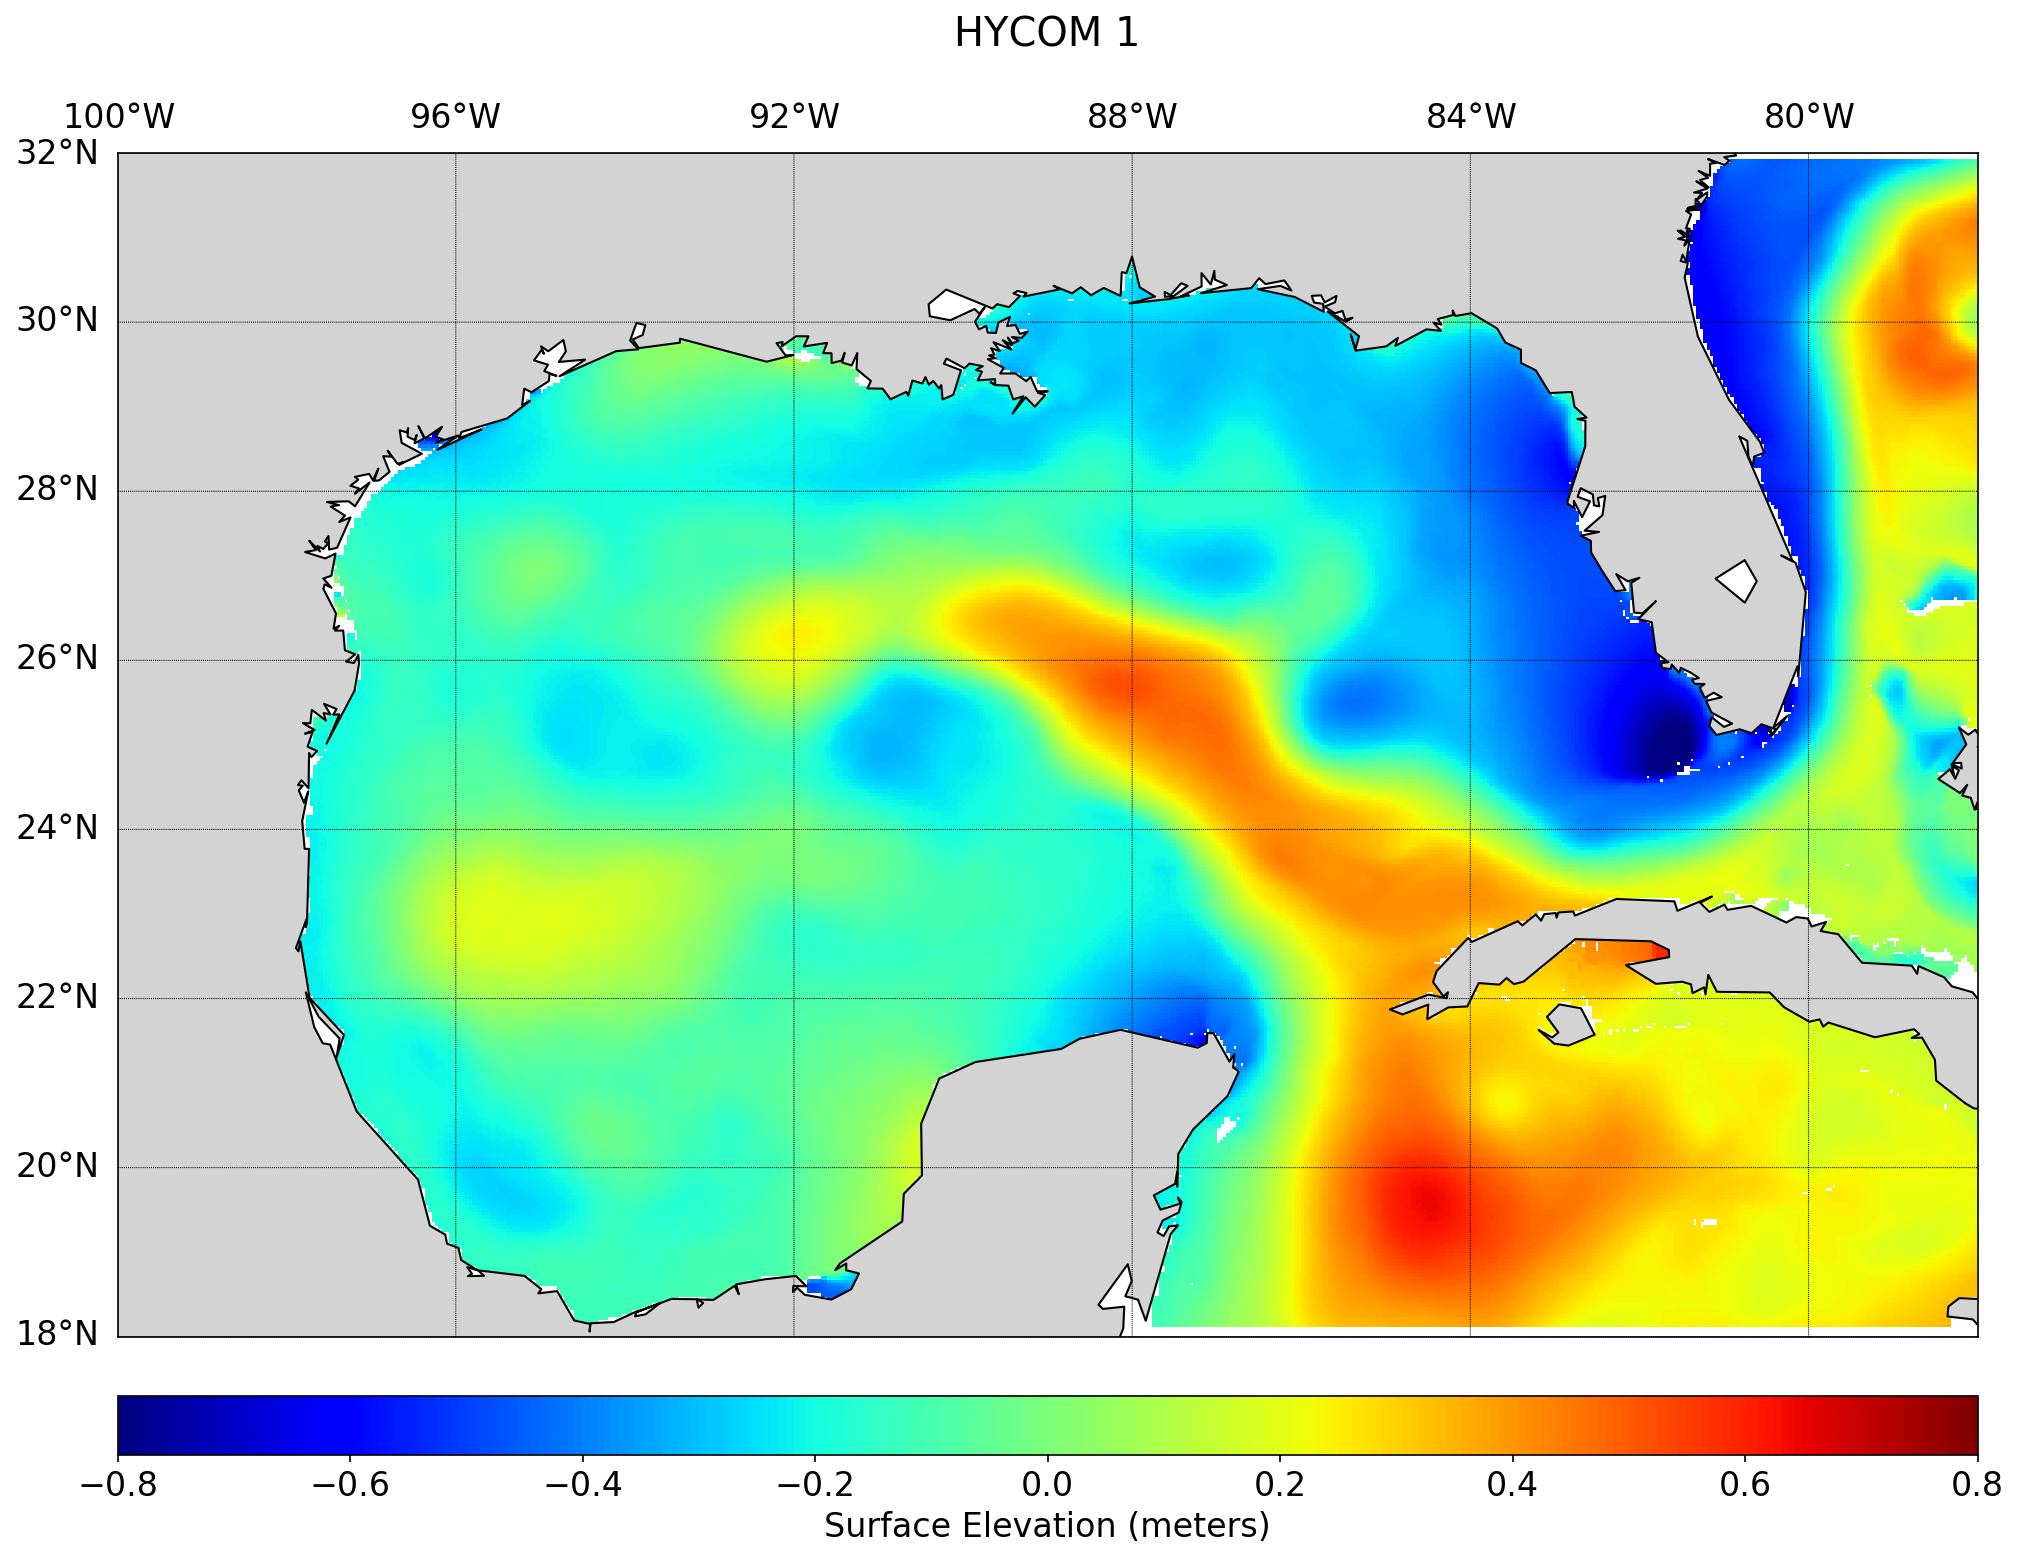

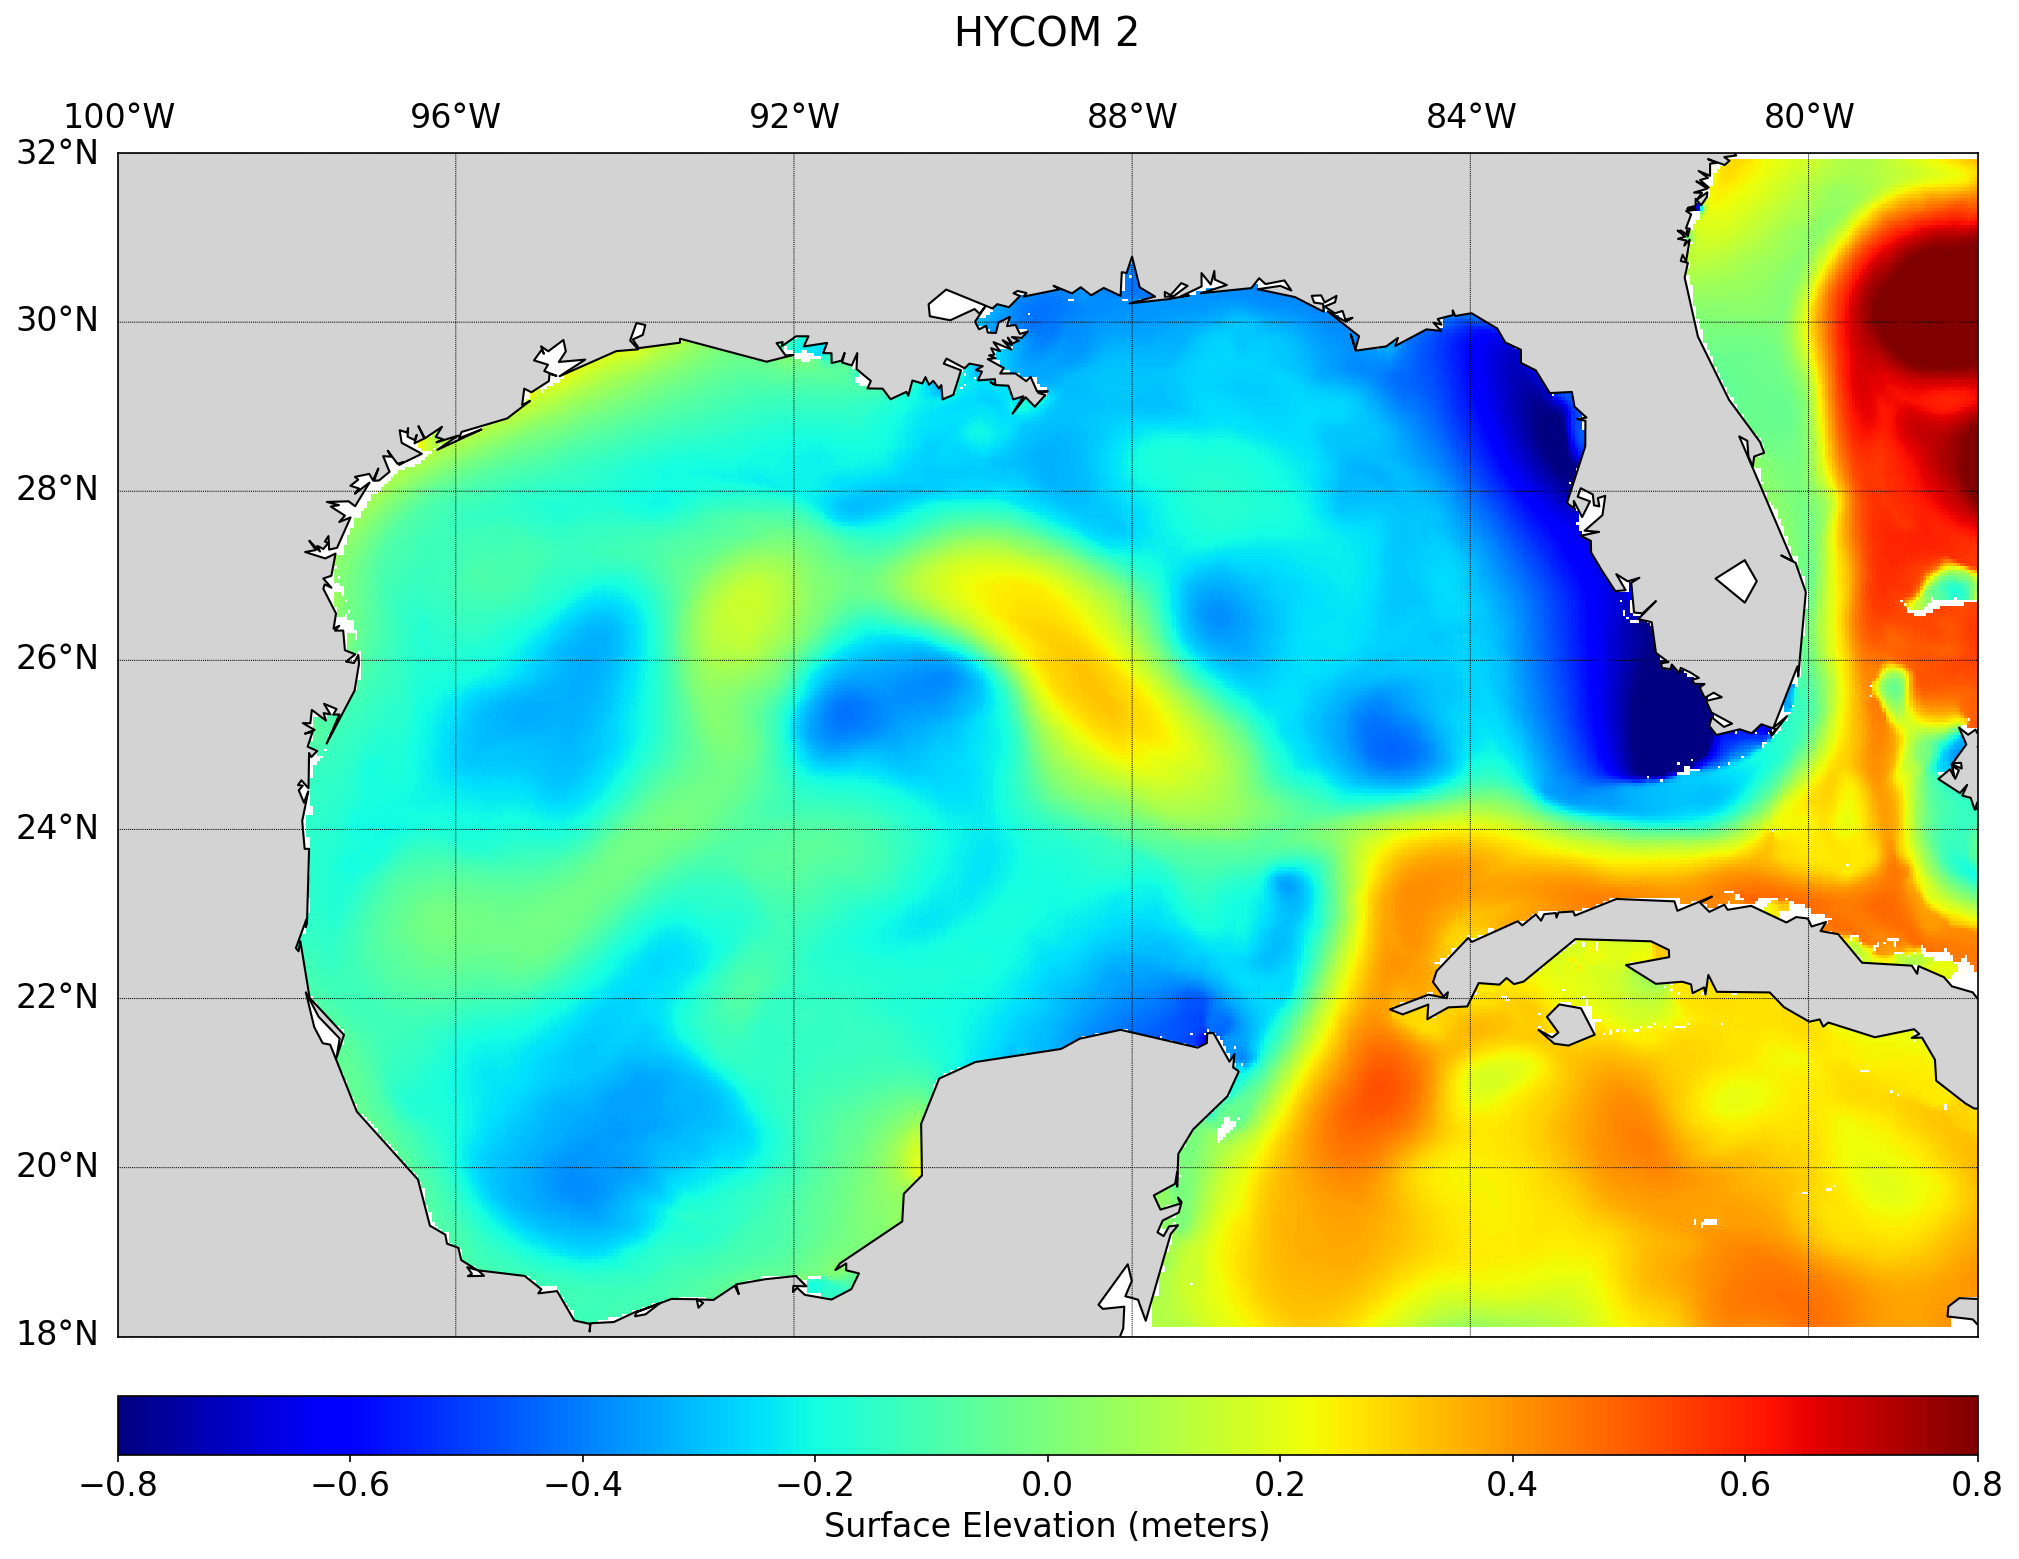

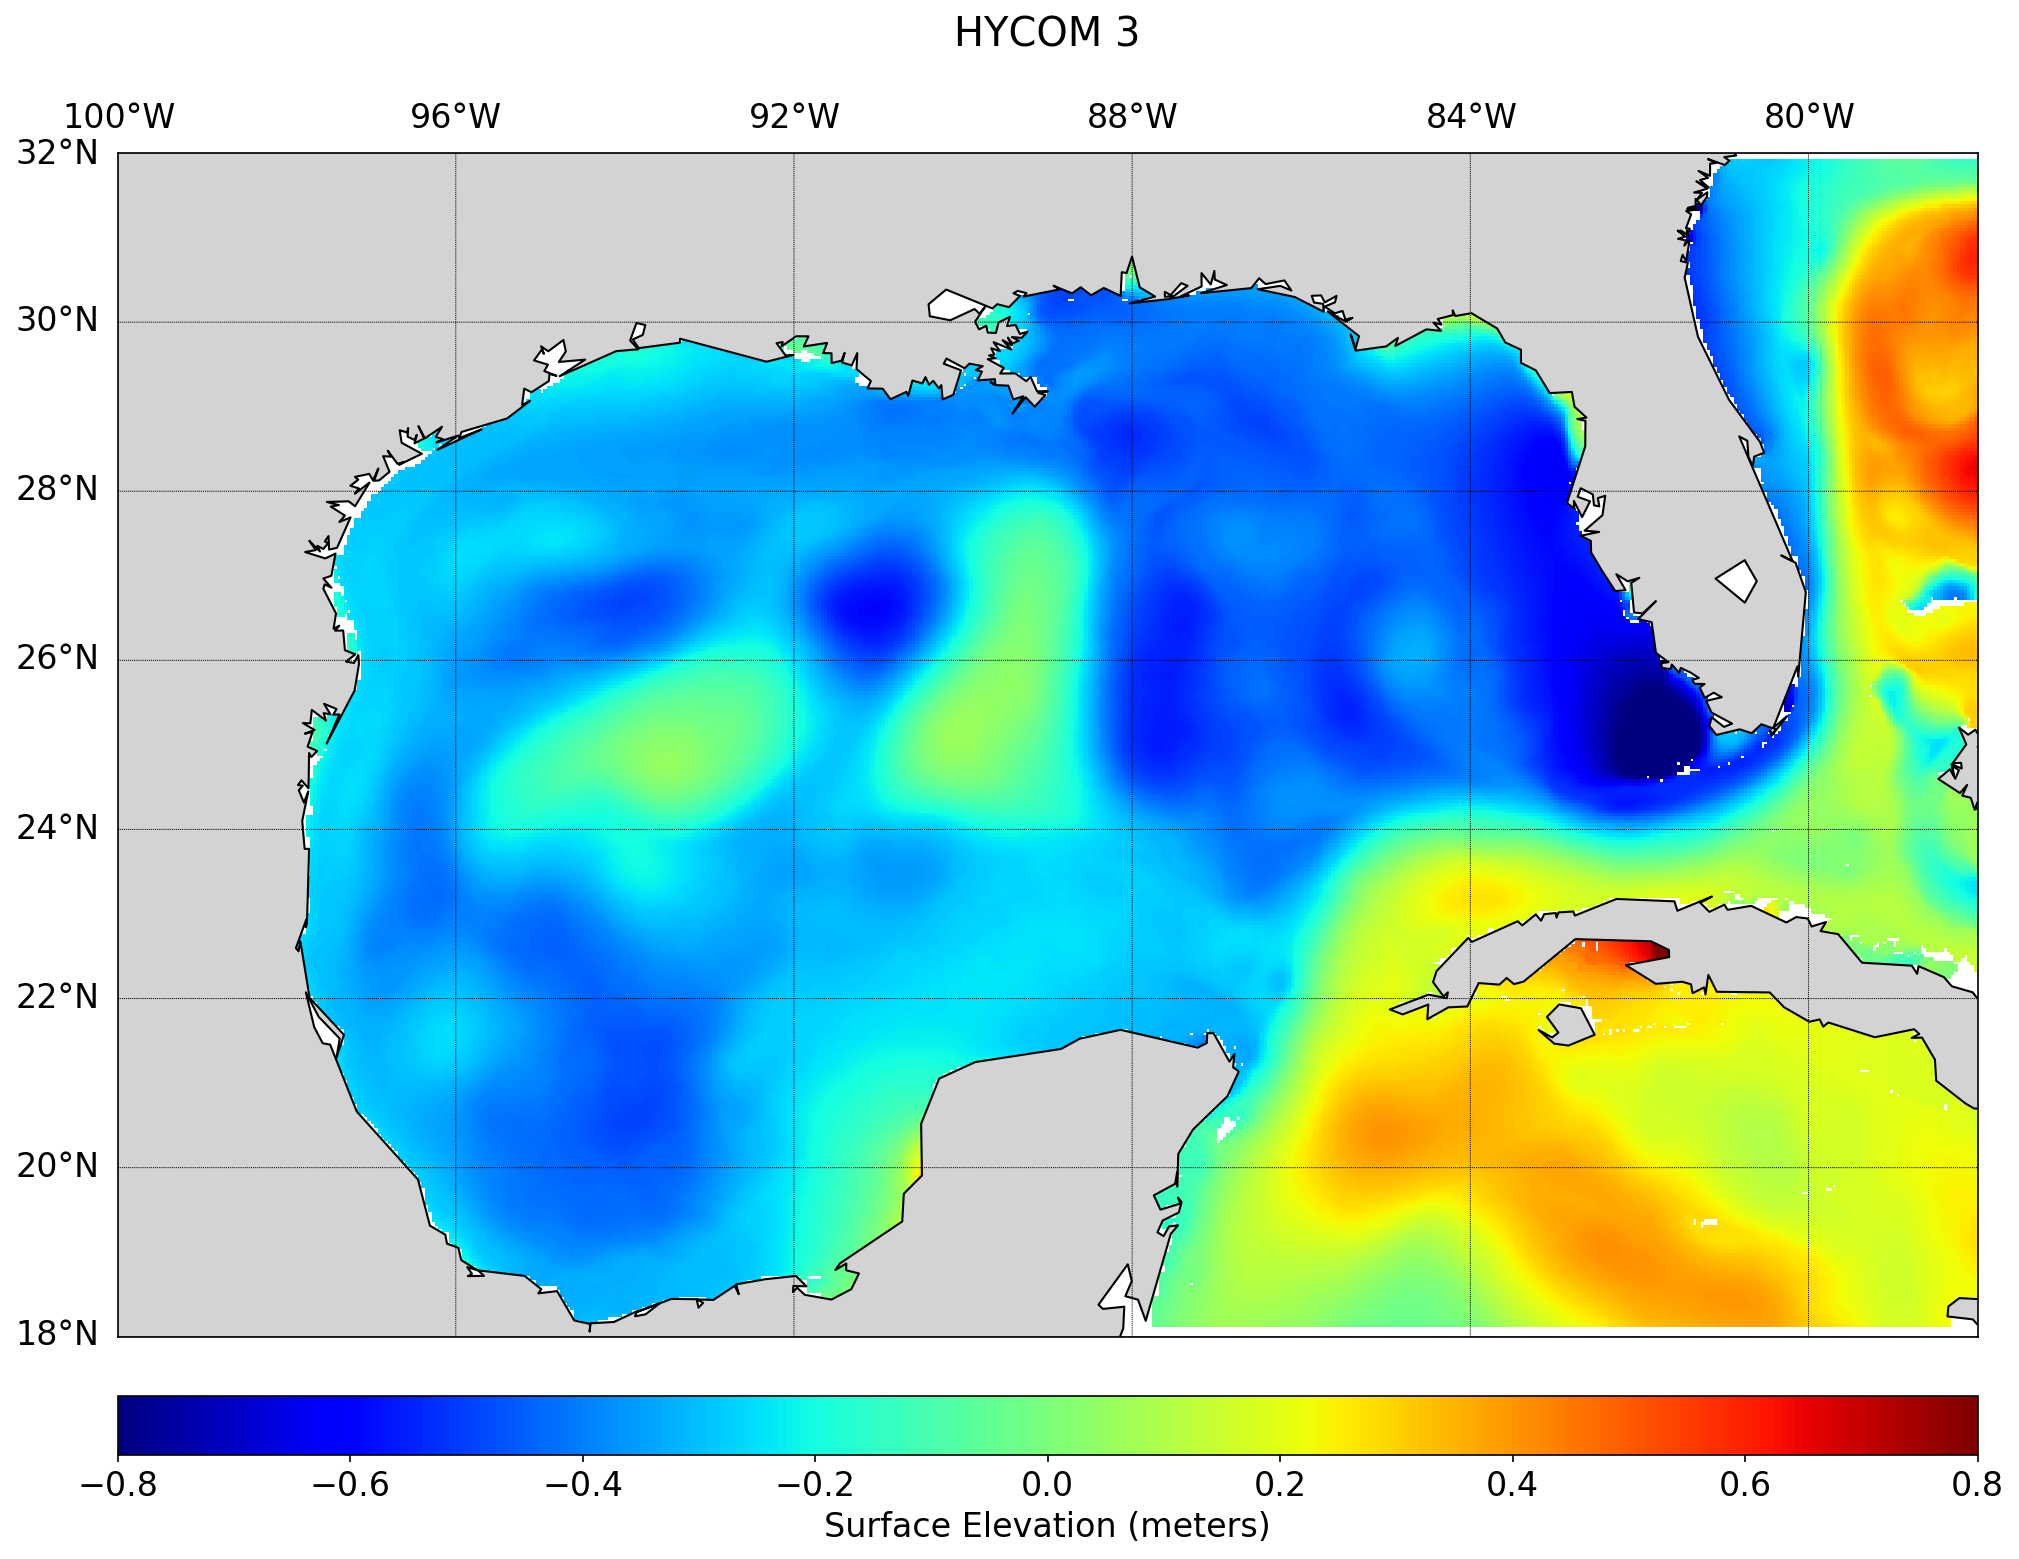

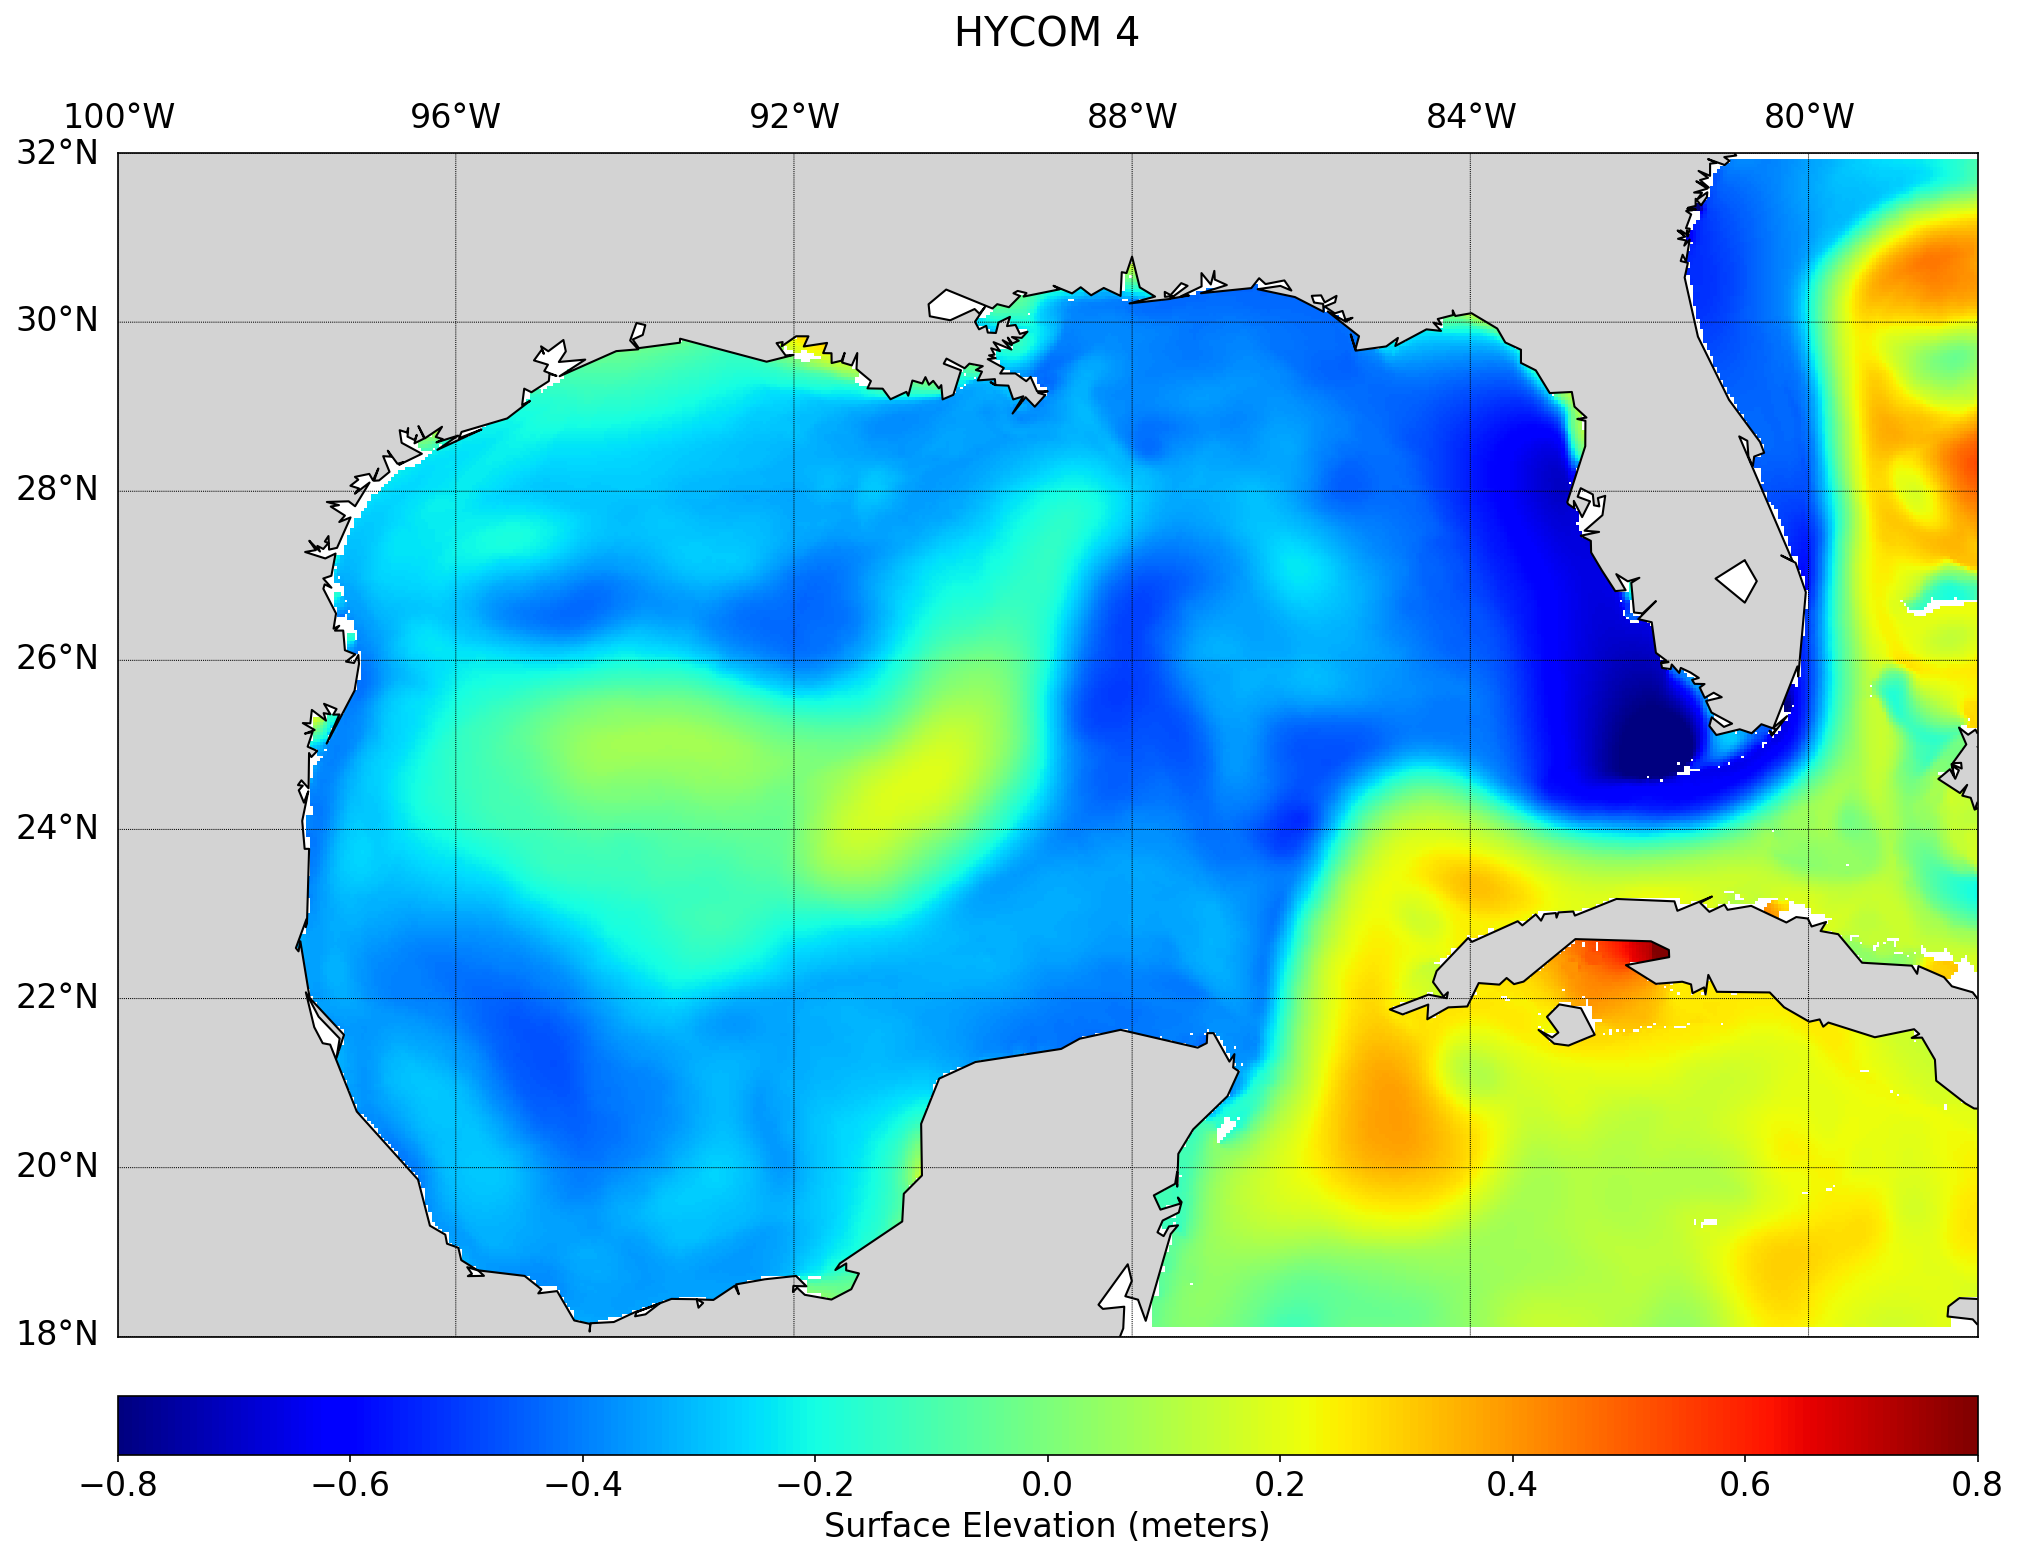

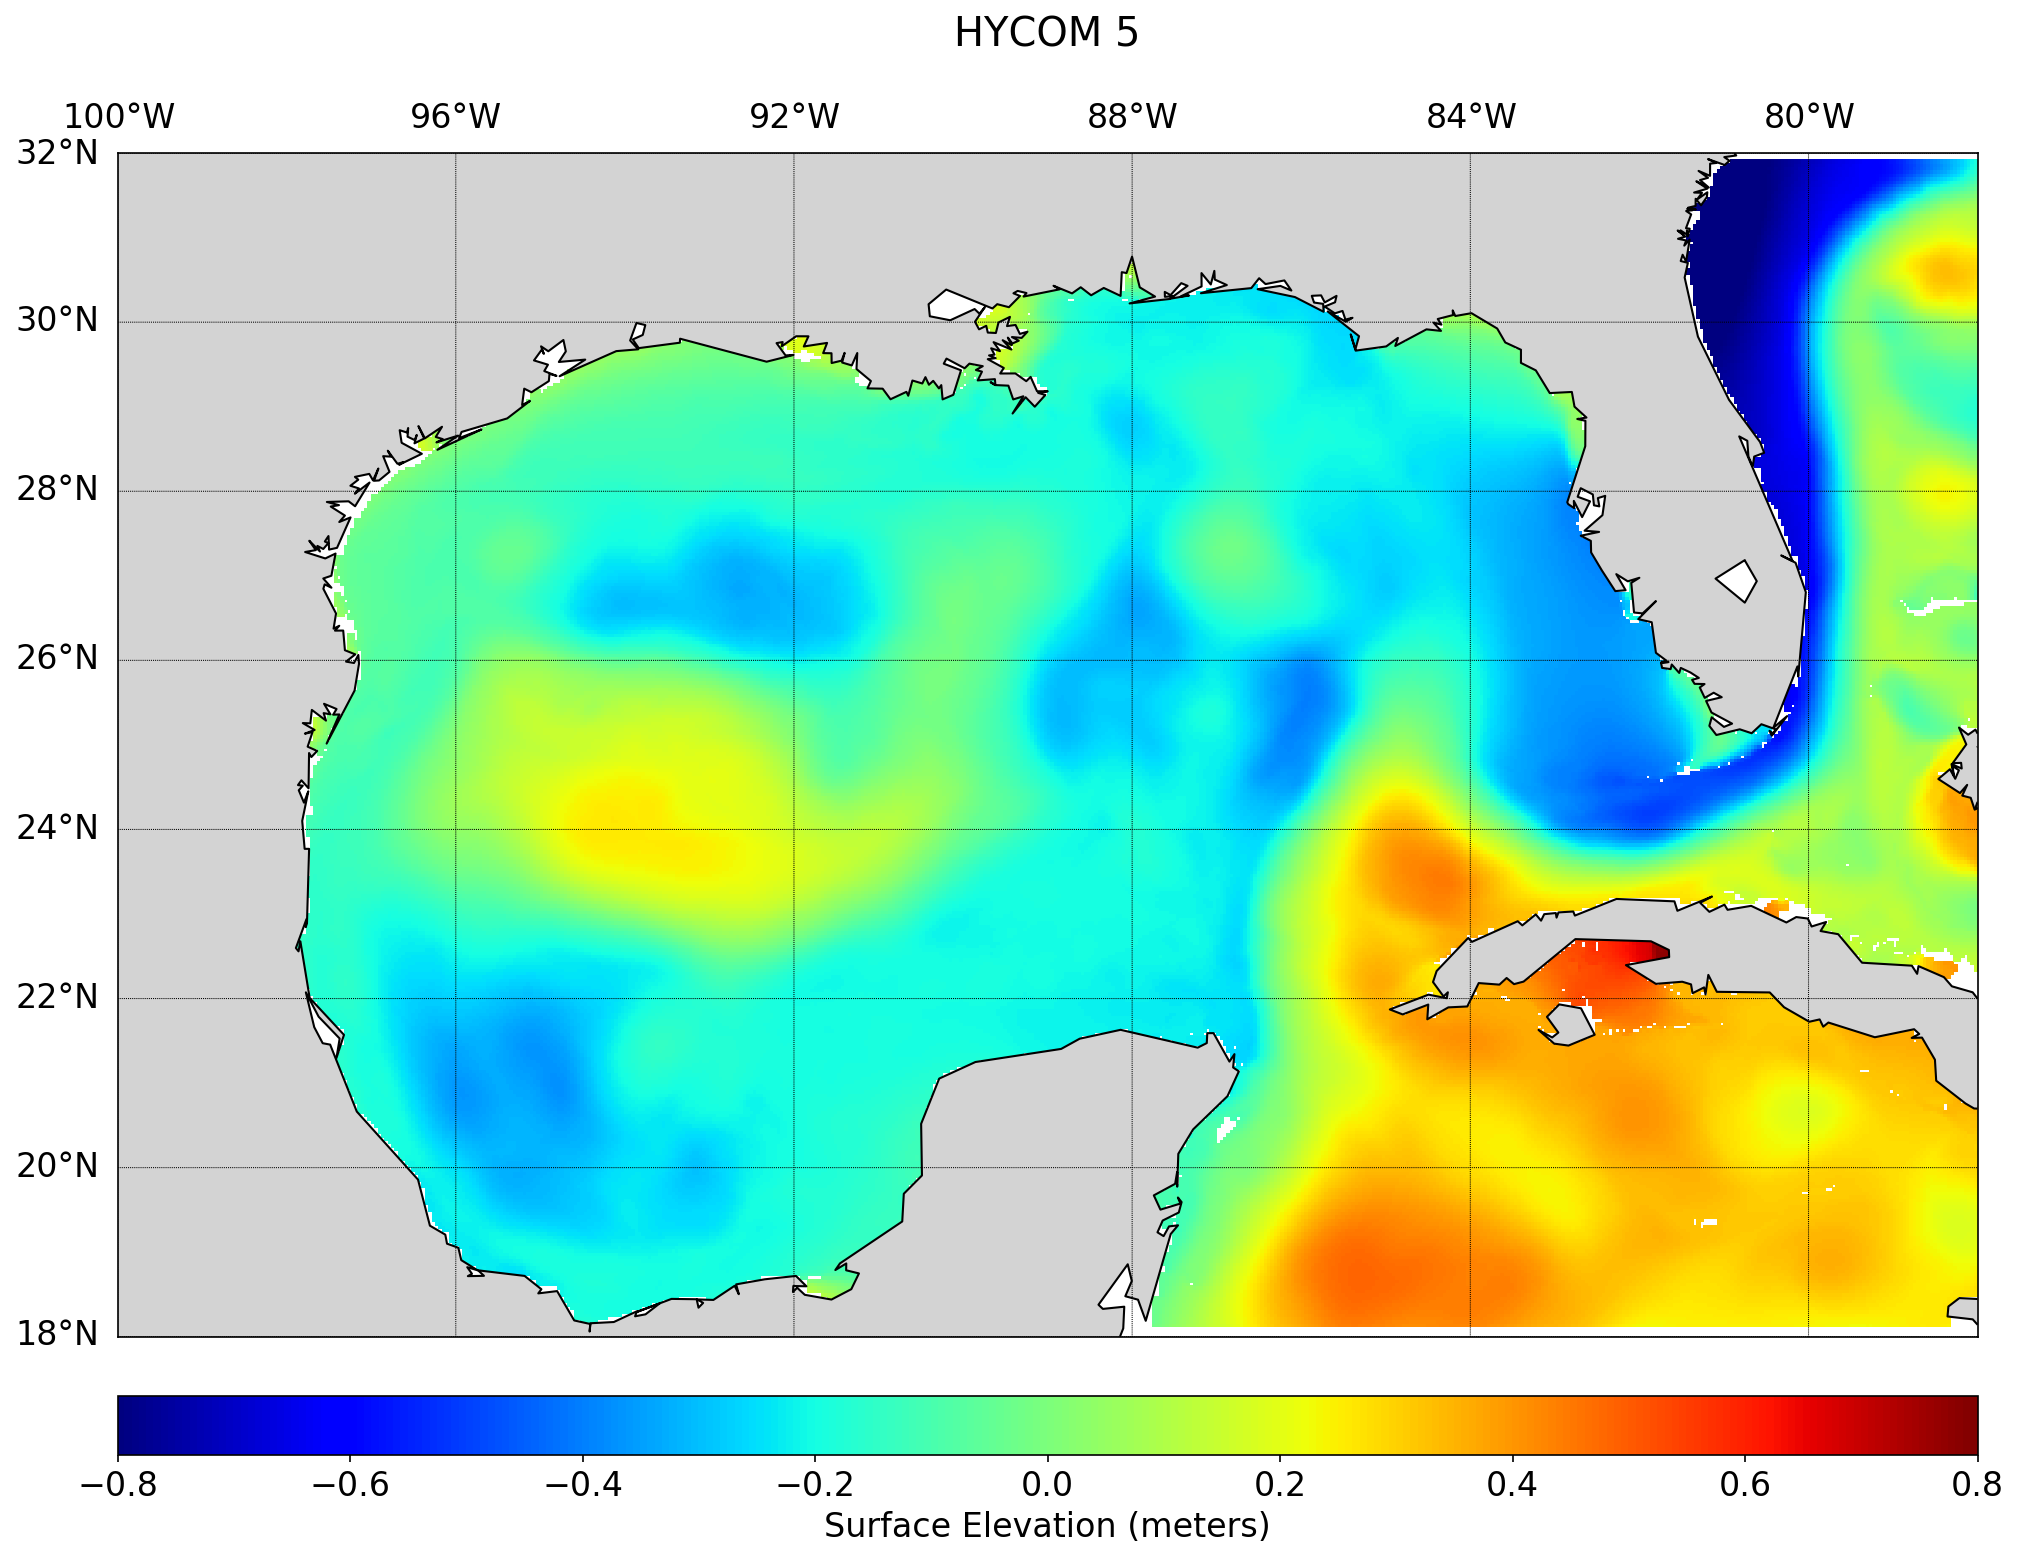

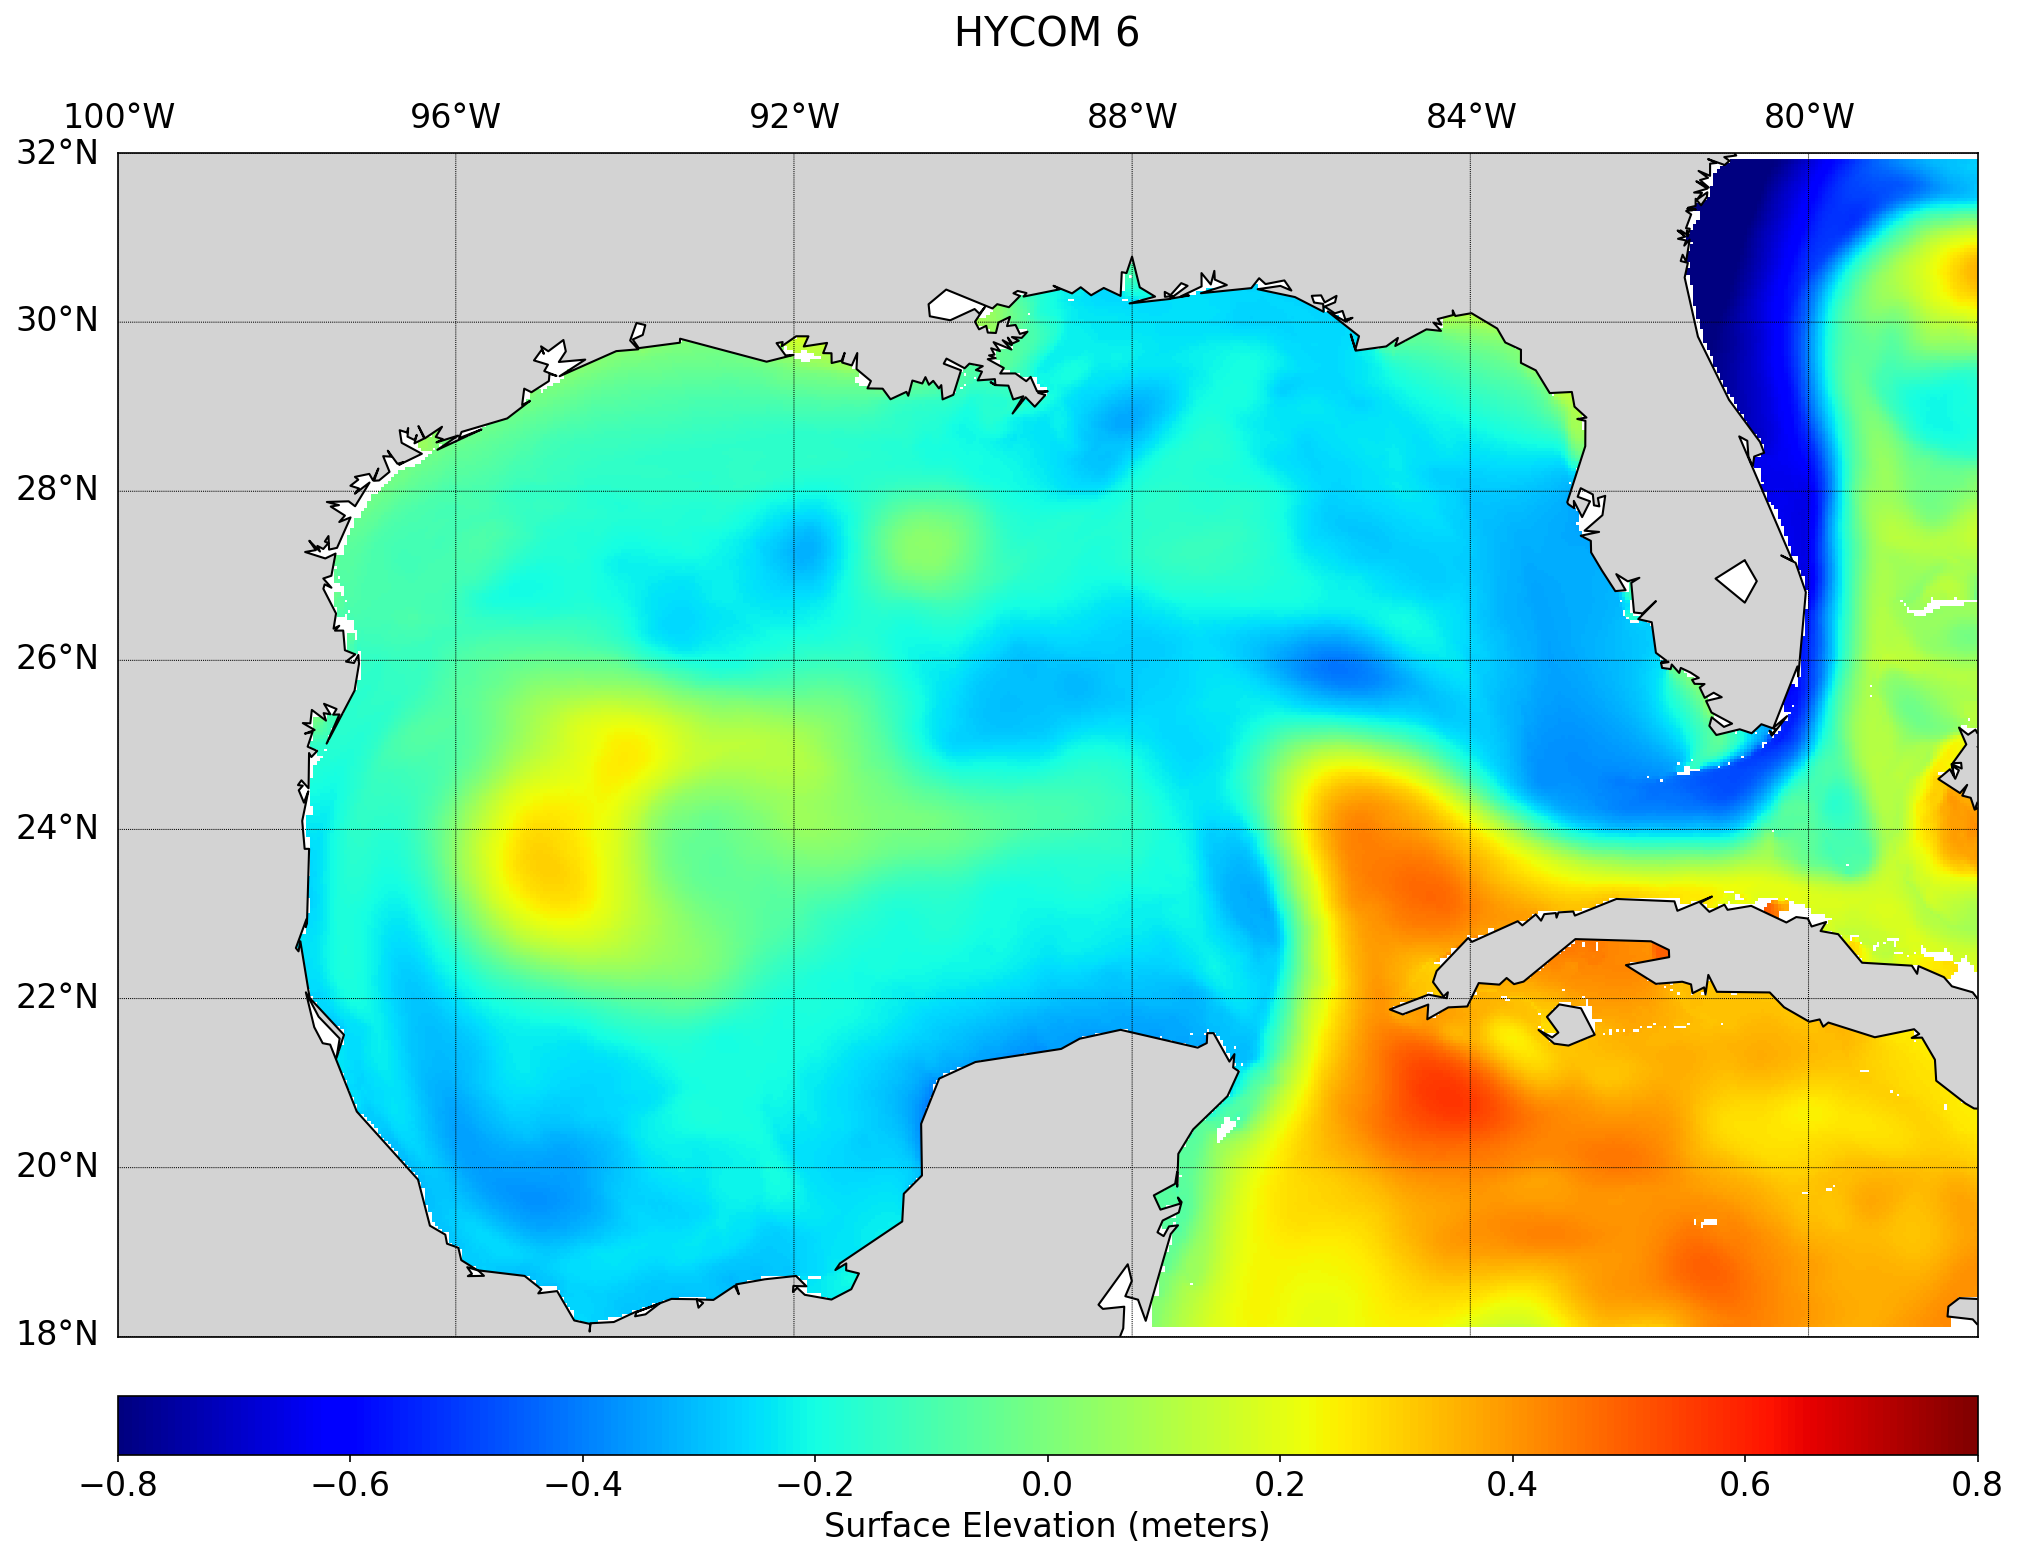

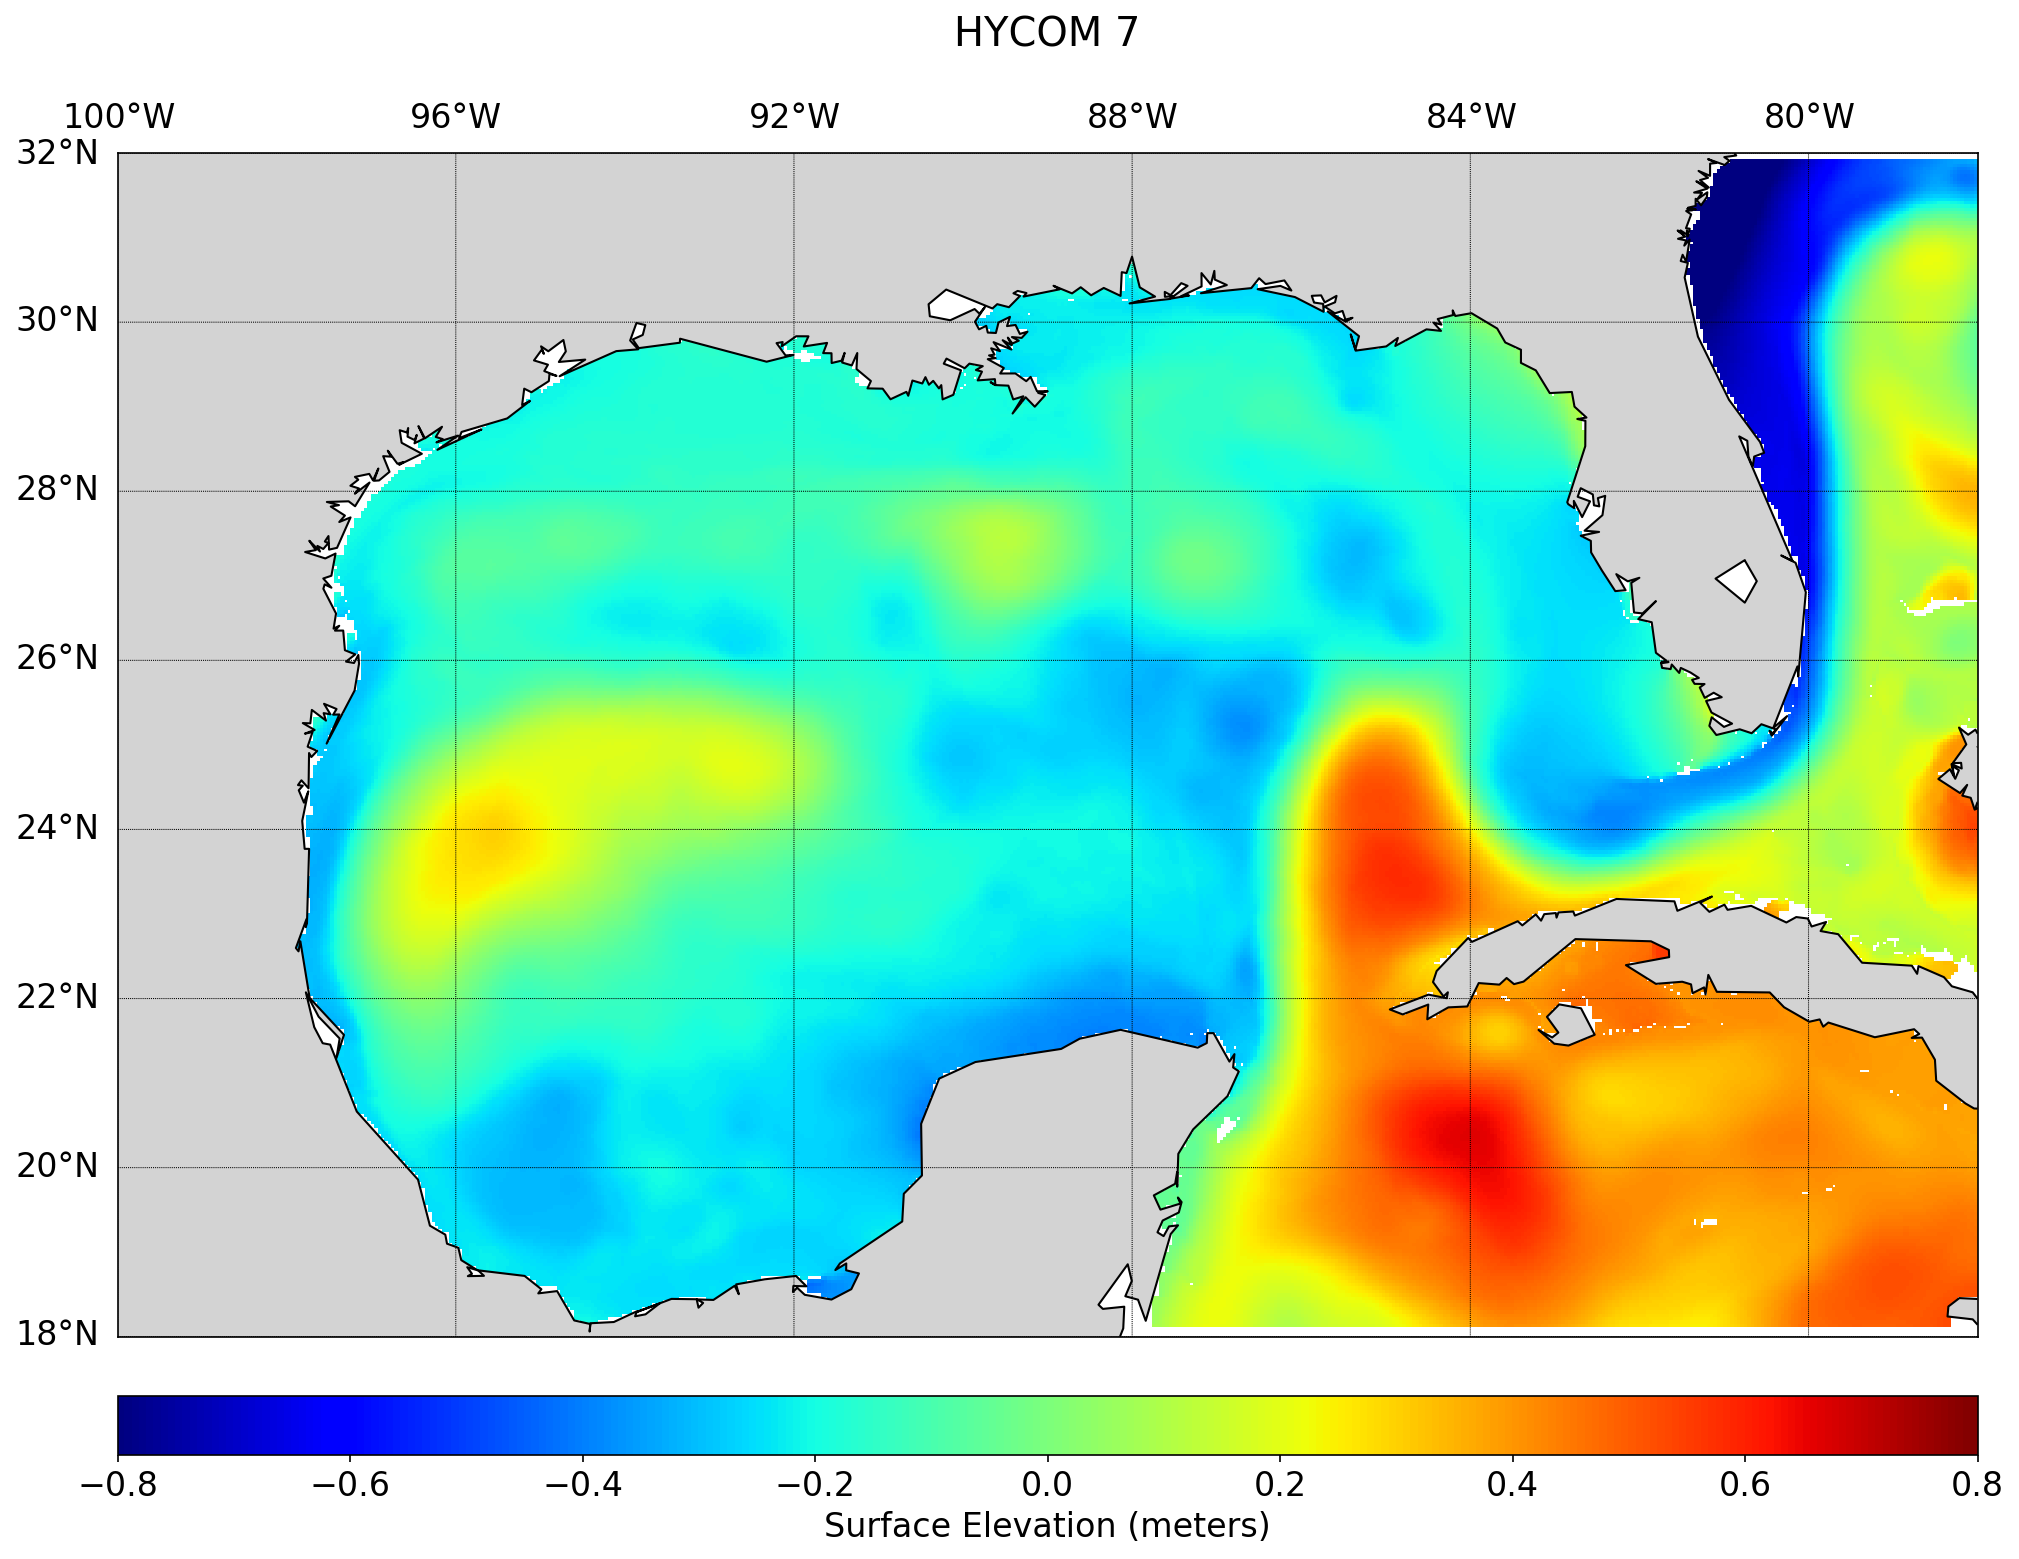

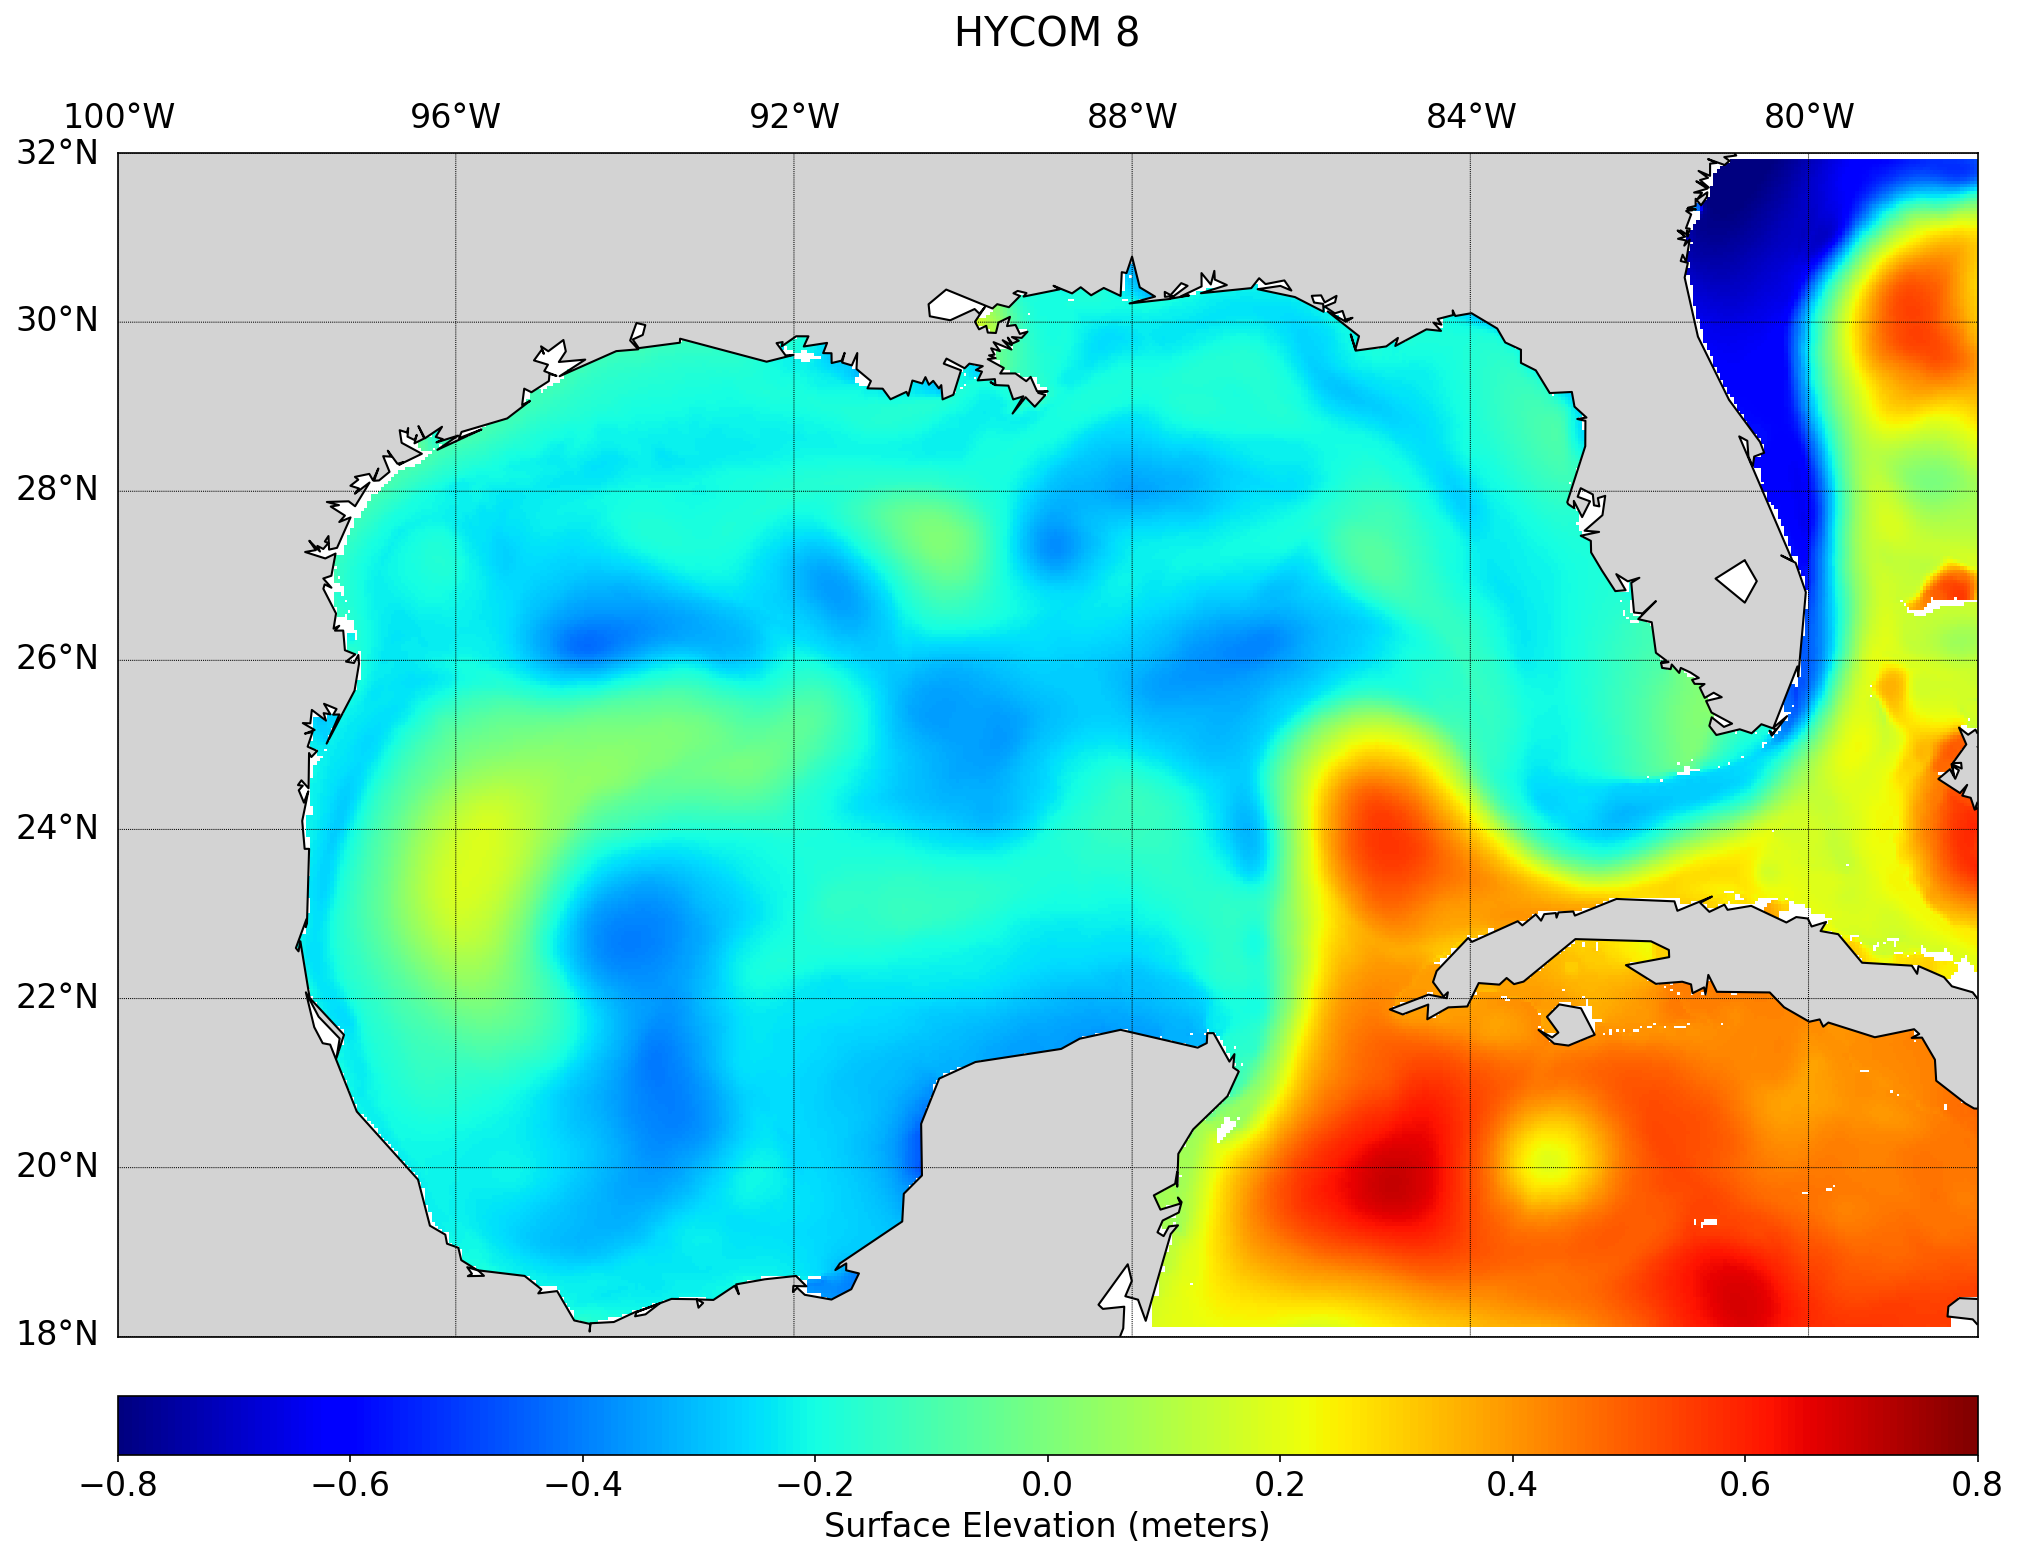

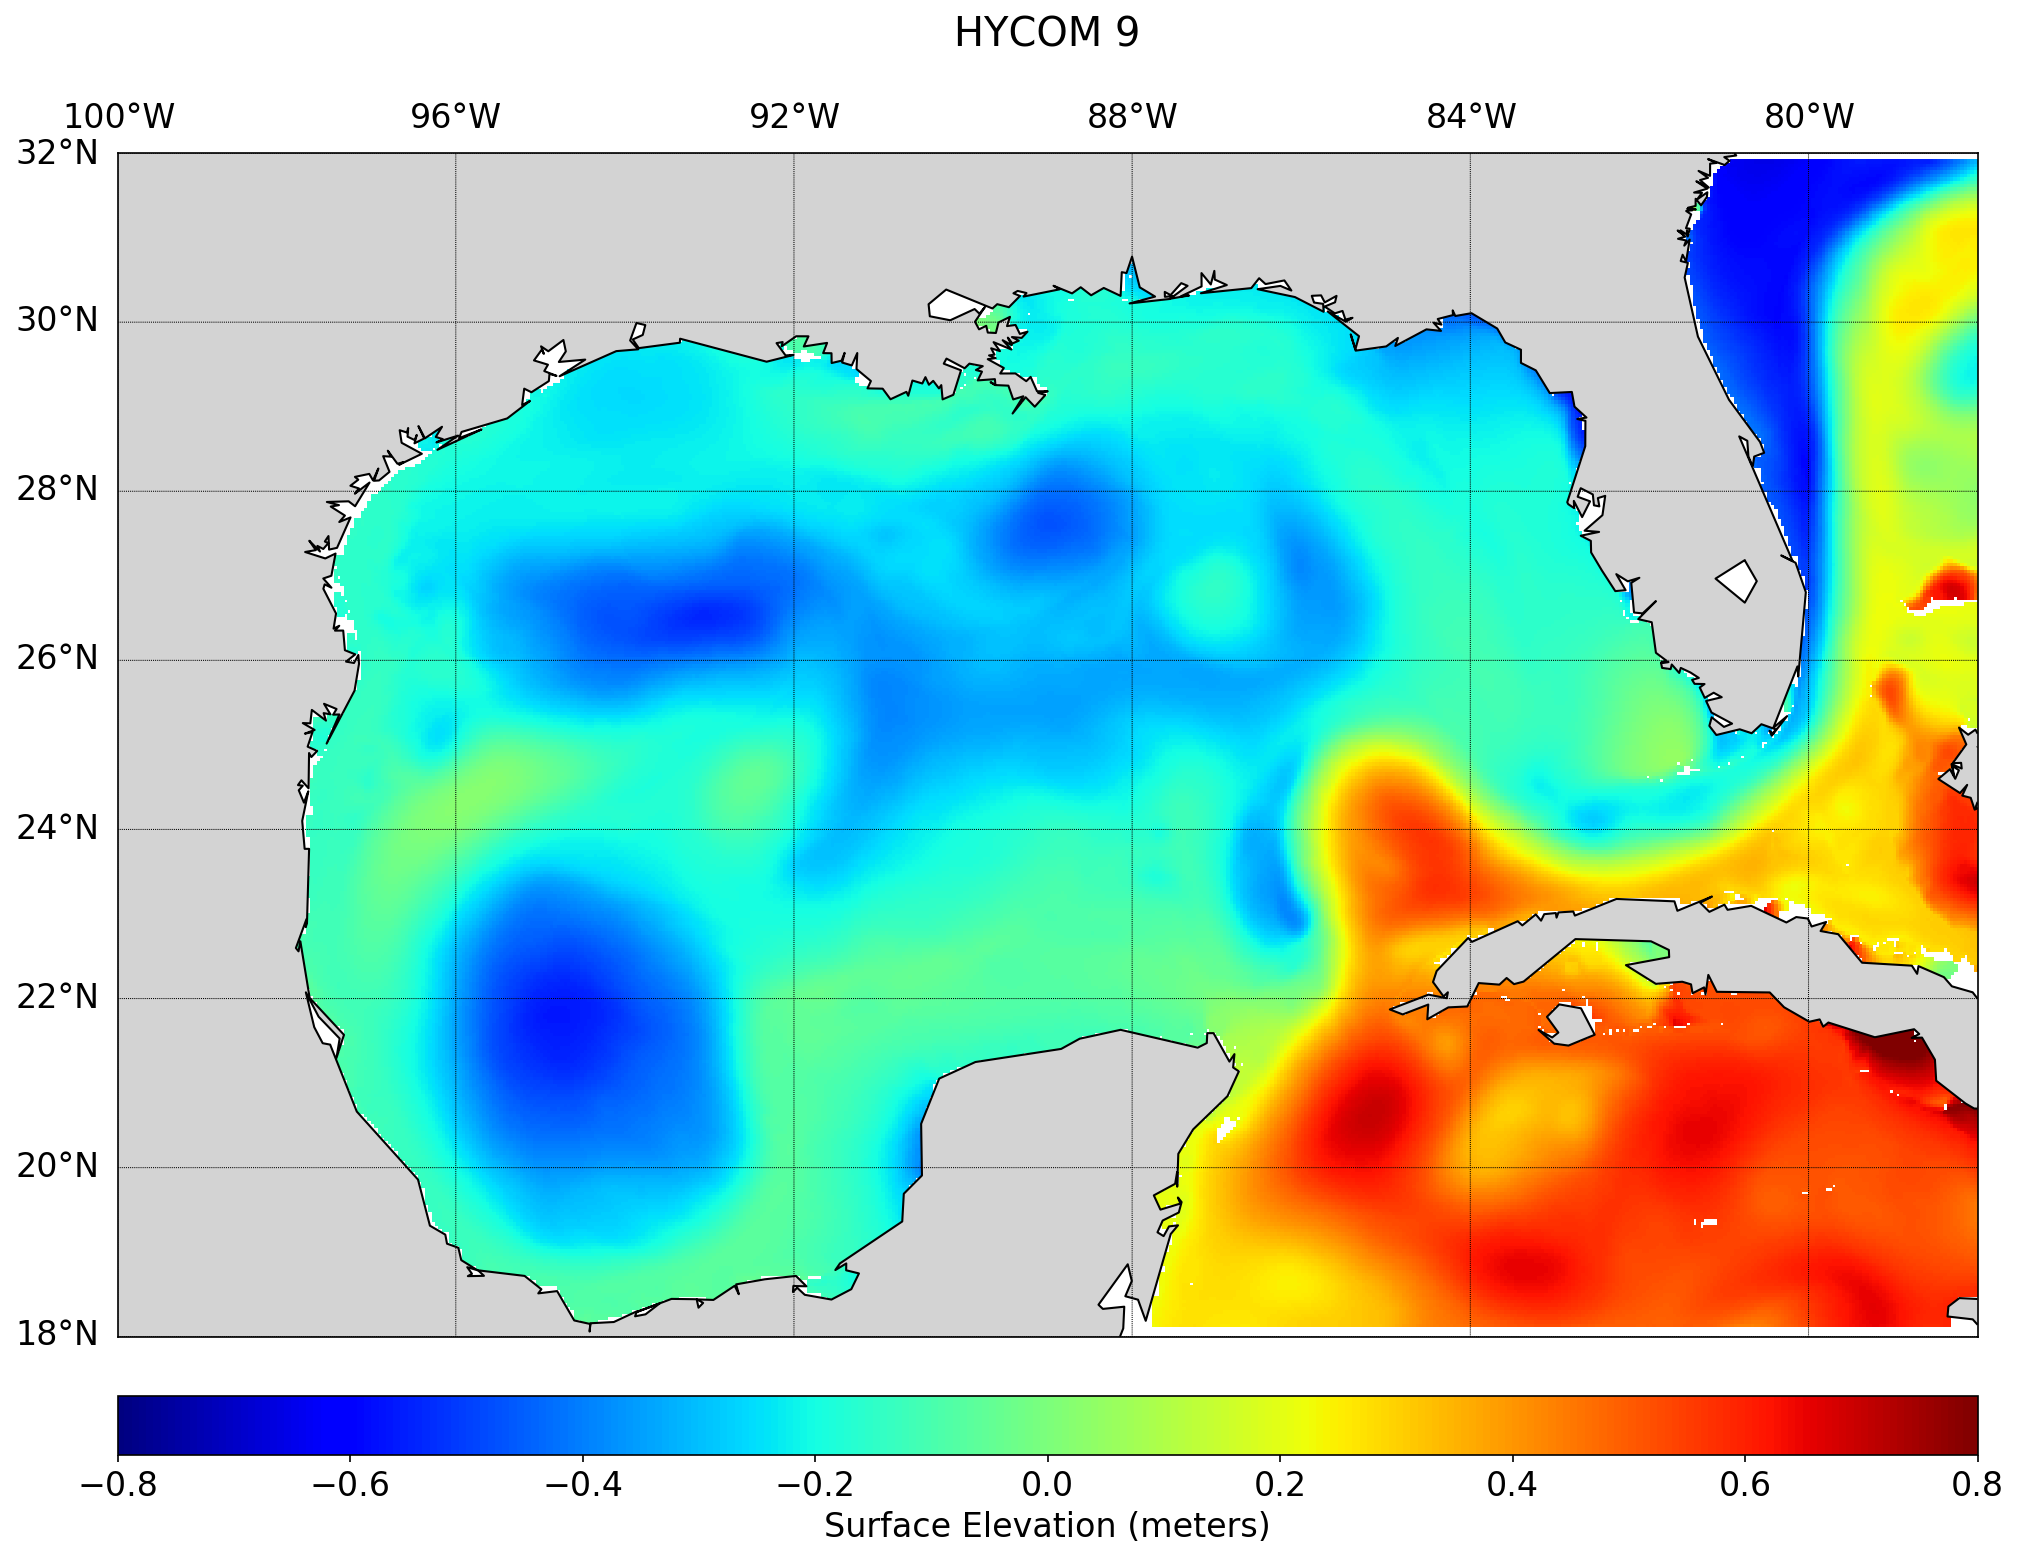

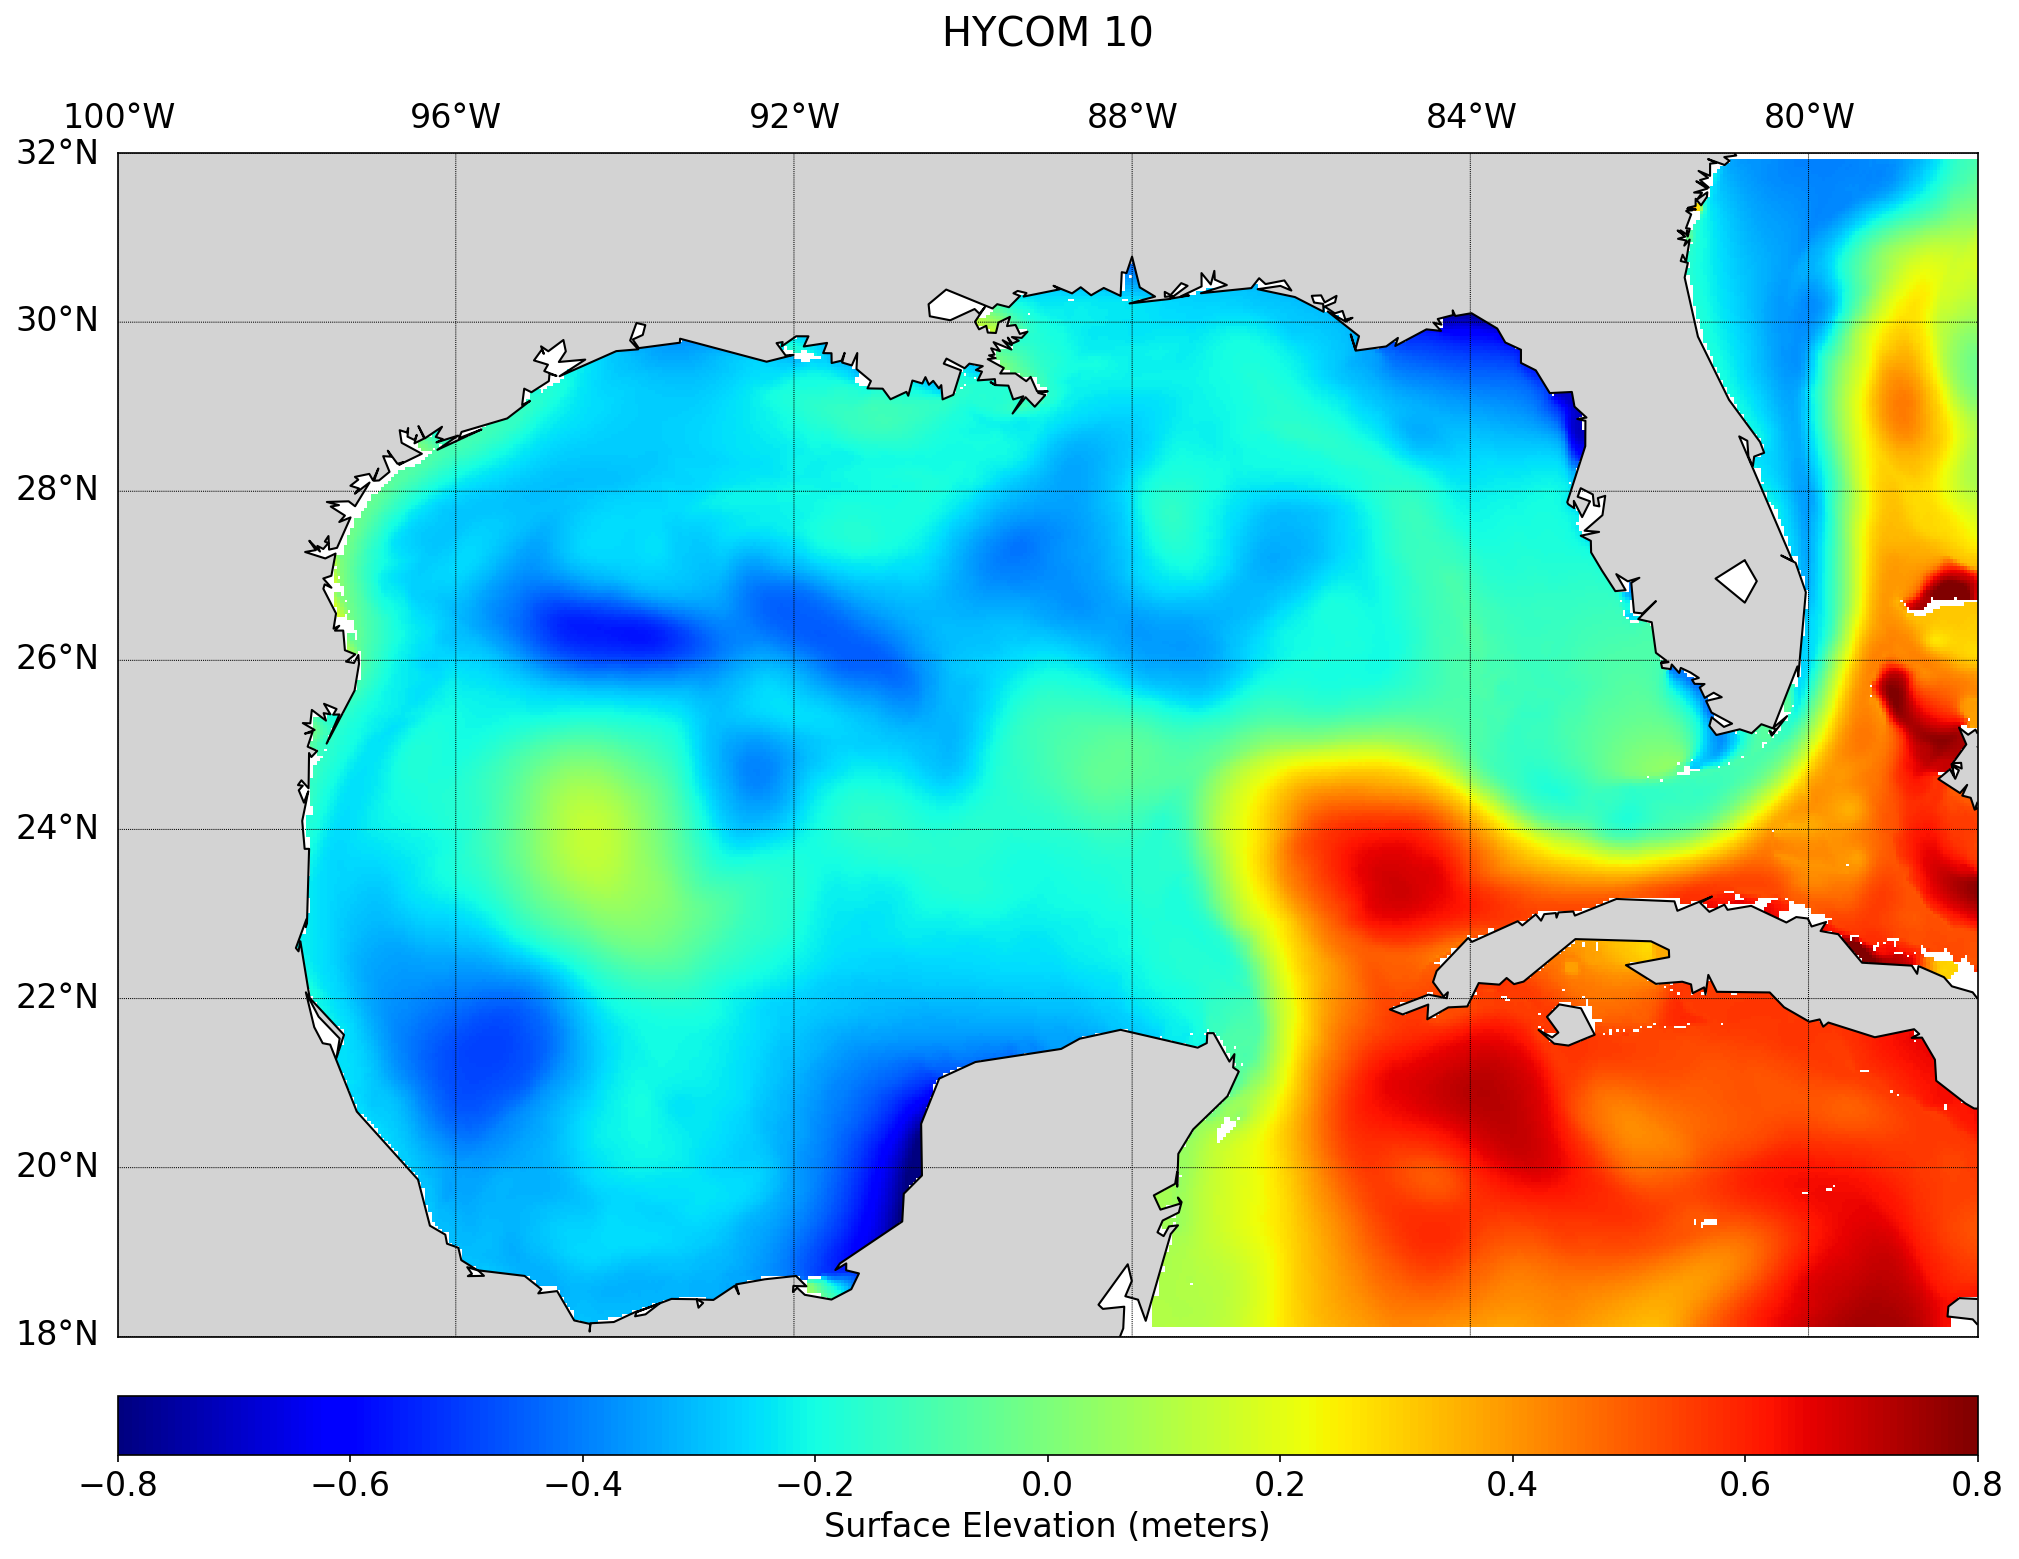

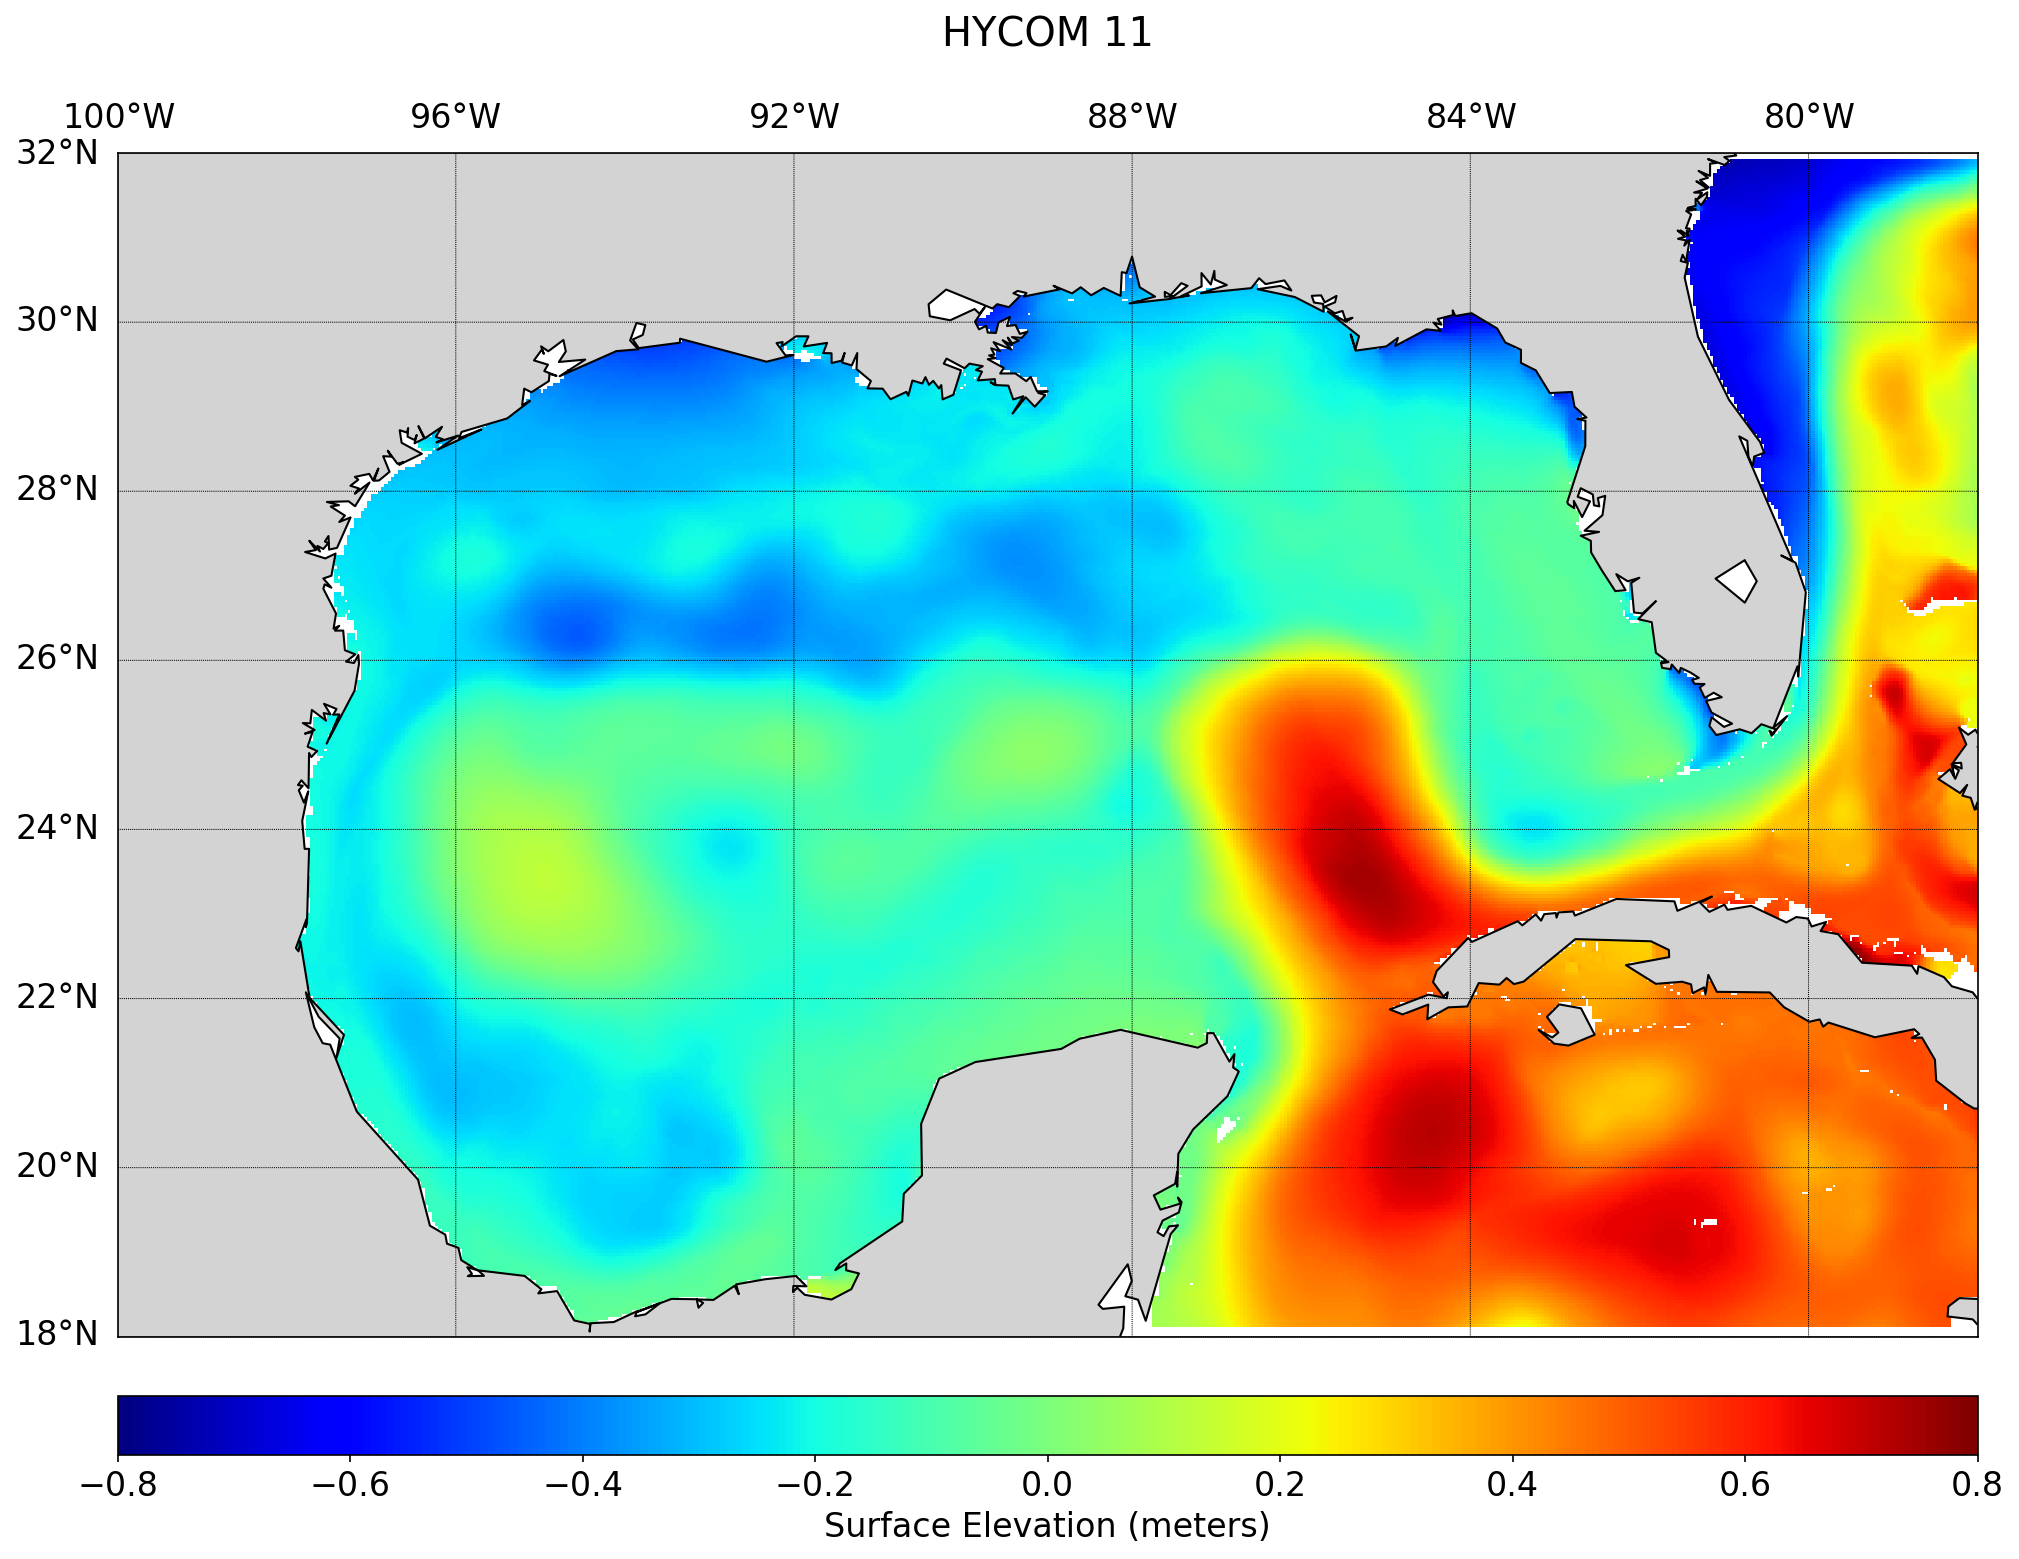

In [6]:
Date = 0
for time_index in range(0, hycom2002_test.time.shape[0]):    
    limN, limS, limE, limW = 32, 18, -78, -100
    fig = plt.figure(figsize=(16,12), facecolor = 'w')
    m = Basemap(projection='cyl', llcrnrlon=limW, \
                urcrnrlon=limE, llcrnrlat=limS, urcrnrlat=limN, resolution='l')    
    m.drawcoastlines()    
    m.fillcontinents(color='lightgrey')    
    #data    
    var = hycom2002_test.surf_el[Date,:,:]    
    Date = Date + 1    
    var_name = "Surface Elevation"    
    punits = "meters"    
    x, y = m(hycom2002_test.lon,hycom2002_test.lat)    
    #plot    
    im1 = m.pcolormesh(x,y,var,zorder = 0, cmap = 'jet', vmin=-.8, vmax=.8)     
    cbar = m.colorbar(im1,location='bottom',pad="5%")    
    cbar.set_label(var_name + ' ('+ punits + ')')    
    #Quiver
#     U = hycom2002_test.water_u[0,0,:,:]
#     V = hycom2002_test.water_v[0,0,:,:]
#     Q = plt.quiver(x[::11], y[::11], U[::11, ::11], V[::11, ::11])
#     qk = plt.quiverkey(Q, 0.1,0.9,1, r'$1 \frac{m}{s}$', labelpos='W')
    #maps    
    dlat = 2    
    dlon = 4    
    m.drawparallels(np.arange(-90.,90.,dlat), linewidth=0.5, labels=[1,0,0,0])    
    m.drawmeridians(np.arange(-180.,180.,dlon), linewidth=0.5, labels=[0,0,1,0])    
    name =  str(Date)    
    plt.title('HYCOM ' + str(time_index), y=1.08)
    #fig.savefig('HYCOM_' + YEAR + name)

# Using Davinci Resolve 

Start a new project.

Drag and drop the images into the "media pool"

-I like to use edit mode instead of clip mode. You can find this on the very bottom of the page.

Drag the images into the timeline.

Right click on an image and go to "Change Duration"

-For these images I like to make them all play for 00:00:01:00 (1 second)

Do this for all of the images.

Highlight all of the images, go to Edit in the menu bar, select "Delete Gaps"

Press play!